In [ ]:
!pip install wandb
import wandb
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense

# Log in to Weights & Biases
wandb.login(key="e3c892d4f8c9cd9b9043d31938ad090f0a32cec1")

# Load and preprocess data
data = pd.read_excel('/content/pcanew12.xlsx')
X = data[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5','PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11','PCA12']]
y = data['Returns direction']

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert y to one-hot encoding
y_onehot = pd.get_dummies(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_onehot, test_size=0.2, random_state=42)

# Define the sweep configuration
sweep_config = {
    'method': 'bayes',
    'name': 'sweep_pca_new_12',
    'metric': {
        'name': 'accuracy',
        'goal': 'maximize'
    },
    'parameters': {
        'epochs': {
            'values': [5, 10]
        },
        'batch_size': {
            'values': [32, 64, 128]
        },
        'optimizer': {
            'values': ['SGD', 'RMSprop','Adam','Nadam']
        },
        'activation': {
            'values': ['relu', 'tanh', 'sigmoid']
        }
    }
}

# Initialize wandb and login
wandb.login()

# Initialize sweep
sweep_id = wandb.sweep(sweep_config, project='modelling')

# Define training function
def train():
    # Initialize wandb run
    with wandb.init():
        # Configurations for this run
        config = wandb.config

        # Define the model
        model = Sequential()
        model.add(Dense(32, input_dim=X_train.shape[1], activation=config.activation))  # Input layer with 64 neurons
        model.add(Dense(64, activation=config.activation))
        model.add(Dense(128, activation=config.activation))
        model.add(Dense(2, activation='softmax'))  # Output layer with 2 nodes and softmax activation

        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer=config.optimizer, metrics=['accuracy'])

        # Train the model
        epochs = config.epochs
        batch_size = config.batch_size

        # Initialize lists to store train loss and accuracy for each epoch
        train_loss_history = []
        train_accuracy_history = []

        for epoch in range(epochs):
            # Shuffle training data for each epoch
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train.iloc[indices]

            # Train the model for one epoch in batches
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
                history = model.train_on_batch(X_batch, y_batch)

            # Calculate train loss and accuracy for this epoch
            train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
            train_loss_history.append(train_loss)
            train_accuracy_history.append(train_accuracy)

            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")
            wandb.log({"epoch": epoch})
            wandb.log({"train loss": train_loss})
            wandb.log({"train accuracy": train_accuracy})

            # Evaluate the model on test data

            val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"val Loss: {val_loss}, Val Accuracy: {val_accuracy}")
            wandb.log({"val loss": val_loss})
            wandb.log({"val accuracy": val_accuracy})



# Run the sweep
wandb.agent(sweep_id, function=train, count=100)



wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc


Create sweep with ID: gbse6g0h
Sweep URL: https://wandb.ai/ma23m010/modelling/sweeps/gbse6g0h


wandb: Agent Starting Run: 9l7mwpb3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6924090385437012, Train Accuracy: 0.5450000166893005
val Loss: 0.6853808164596558, Val Accuracy: 0.5920000076293945
Epoch 2/10 - Train Loss: 0.6921982765197754, Train Accuracy: 0.515999972820282
val Loss: 0.6936518549919128, Val Accuracy: 0.5440000295639038
Epoch 3/10 - Train Loss: 0.6909985542297363, Train Accuracy: 0.527999997138977
val Loss: 0.6934703588485718, Val Accuracy: 0.5720000267028809
Epoch 4/10 - Train Loss: 0.6916247010231018, Train Accuracy: 0.5440000295639038
val Loss: 0.6738547086715698, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6875777840614319, Train Accuracy: 0.5609999895095825
val Loss: 0.6900761723518372, Val Accuracy: 0.6079999804496765
Epoch 6/10 - Train Loss: 0.6850364208221436, Train Accuracy: 0.5460000038146973
val Loss: 0.674121618270874, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6827235221862793, Train Accuracy: 0.5590000152587891
val Loss: 0.6749825477600098, Val Accuracy: 0.6000000238418579
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▅▁▃▅▇▅▇▅▇█
train loss,██▇█▆▄▃▃▂▁
val accuracy,▅▁▄▆▇▆▆▆▇█
val loss,▅██▂▇▂▂▁▁▂
epoch,9
train accuracy,0.569
train loss,0.67807
val accuracy,0.62
val loss,0.67359


wandb: Agent Starting Run: lppjja44 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6656646132469177, Train Accuracy: 0.6060000061988831
val Loss: 0.6612505912780762, Val Accuracy: 0.6399999856948853
Epoch 2/5 - Train Loss: 0.6437241435050964, Train Accuracy: 0.6399999856948853
val Loss: 0.6542927622795105, Val Accuracy: 0.6480000019073486
Epoch 3/5 - Train Loss: 0.6237908005714417, Train Accuracy: 0.6639999747276306
val Loss: 0.6382349729537964, Val Accuracy: 0.6880000233650208
Epoch 4/5 - Train Loss: 0.6050188541412354, Train Accuracy: 0.6940000057220459
val Loss: 0.6566758751869202, Val Accuracy: 0.6200000047683716
Epoch 5/5 - Train Loss: 0.5803598165512085, Train Accuracy: 0.6959999799728394
val Loss: 0.6115599870681763, Val Accuracy: 0.7120000123977661


epoch,▁▃▅▆█
train accuracy,▁▄▆██
train loss,█▆▅▃▁
val accuracy,▃▃▆▁█
val loss,█▇▅▇▁
epoch,4
train accuracy,0.696
train loss,0.58036
val accuracy,0.712
val loss,0.61156


wandb: Agent Starting Run: 9lqc1gqr with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6837437152862549, Train Accuracy: 0.5410000085830688
val Loss: 0.6760390996932983, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.675413966178894, Train Accuracy: 0.5569999814033508
val Loss: 0.6712613105773926, Val Accuracy: 0.5960000157356262
Epoch 3/10 - Train Loss: 0.663899302482605, Train Accuracy: 0.6110000014305115
val Loss: 0.6676279306411743, Val Accuracy: 0.6240000128746033
Epoch 4/10 - Train Loss: 0.6585971117019653, Train Accuracy: 0.6069999933242798
val Loss: 0.6935168504714966, Val Accuracy: 0.515999972820282
Epoch 5/10 - Train Loss: 0.6328051090240479, Train Accuracy: 0.6690000295639038
val Loss: 0.6727244853973389, Val Accuracy: 0.6079999804496765
Epoch 6/10 - Train Loss: 0.6028854250907898, Train Accuracy: 0.6919999718666077
val Loss: 0.6381635069847107, Val Accuracy: 0.656000018119812
Epoch 7/10 - Train Loss: 0.5810364484786987, Train Accuracy: 0.7250000238418579
val Loss: 0.6445721983909607, Val Accuracy: 0.6679999828338623
Epo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▂▃▃▅▆▇▇██
train loss,██▇▇▆▄▃▃▁▁
val accuracy,▄▄▄▁▄▅▆▅██
val loss,▇▇▆█▇▄▅▆▂▁
epoch,9
train accuracy,0.731
train loss,0.52816
val accuracy,0.736
val loss,0.58402


wandb: Agent Starting Run: 9alg5m5x with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6901564002037048, Train Accuracy: 0.5410000085830688
val Loss: 0.6772557497024536, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6923232674598694, Train Accuracy: 0.5410000085830688
val Loss: 0.6911843419075012, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6897351741790771, Train Accuracy: 0.5410000085830688
val Loss: 0.6797090172767639, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6912586688995361, Train Accuracy: 0.5410000085830688
val Loss: 0.688232958316803, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6902990341186523, Train Accuracy: 0.5410000085830688
val Loss: 0.6848423480987549, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6897323131561279, Train Accuracy: 0.5410000085830688
val Loss: 0.6786764860153198, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6896900534629822, Train Accuracy: 0.5410000085830688
val Loss: 0.6788332462310791, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,▂█▁▅▃▁▁▂▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▁█▂▇▅▂▂▄▃▂
epoch,9
train accuracy,0.541
train loss,0.68966
val accuracy,0.6
val loss,0.67837


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 88s43c1c with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.69227135181427, Train Accuracy: 0.5210000276565552
val Loss: 0.6901092529296875, Val Accuracy: 0.5559999942779541
Epoch 2/5 - Train Loss: 0.6904484033584595, Train Accuracy: 0.5410000085830688
val Loss: 0.6850879788398743, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6898357272148132, Train Accuracy: 0.5410000085830688
val Loss: 0.6832504868507385, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6894300580024719, Train Accuracy: 0.5410000085830688
val Loss: 0.6820803880691528, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6891014575958252, Train Accuracy: 0.5410000085830688
val Loss: 0.6810553073883057, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁████
train loss,█▄▃▂▁
val accuracy,▁████
val loss,█▄▃▂▁
epoch,4
train accuracy,0.541
train loss,0.6891
val accuracy,0.6
val loss,0.68106


wandb: Agent Starting Run: 8t77v8cj with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6928960084915161, Train Accuracy: 0.5410000085830688
val Loss: 0.676586389541626, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6921567320823669, Train Accuracy: 0.5410000085830688
val Loss: 0.6773104667663574, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6917235851287842, Train Accuracy: 0.5410000085830688
val Loss: 0.6776226162910461, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6912611126899719, Train Accuracy: 0.5410000085830688
val Loss: 0.6781877875328064, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6908965706825256, Train Accuracy: 0.5410000085830688
val Loss: 0.6785473823547363, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6905158162117004, Train Accuracy: 0.5410000085830688
val Loss: 0.6792138814926147, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.690236508846283, Train Accuracy: 0.5410000085830688
val Loss: 0.6791169047355652, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,█▇▆▅▄▃▃▂▂▁
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▁▃▃▅▆▇▇███
epoch,9
train accuracy,0.541
train loss,0.68944
val accuracy,0.6
val loss,0.67956


wandb: Agent Starting Run: raftcbsp with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.7278783321380615, Train Accuracy: 0.5410000085830688
val Loss: 0.6746512055397034, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6979998350143433, Train Accuracy: 0.46799999475479126
val Loss: 0.7305154800415039, Val Accuracy: 0.4000000059604645
Epoch 3/10 - Train Loss: 0.6336163282394409, Train Accuracy: 0.6660000085830688
val Loss: 0.6343234777450562, Val Accuracy: 0.6840000152587891
Epoch 4/10 - Train Loss: 0.6155779361724854, Train Accuracy: 0.699999988079071
val Loss: 0.6534368991851807, Val Accuracy: 0.6520000100135803
Epoch 5/10 - Train Loss: 0.6245312094688416, Train Accuracy: 0.6290000081062317
val Loss: 0.7110825181007385, Val Accuracy: 0.5239999890327454
Epoch 6/10 - Train Loss: 0.6291612386703491, Train Accuracy: 0.6290000081062317
val Loss: 0.633860170841217, Val Accuracy: 0.6639999747276306
Epoch 7/10 - Train Loss: 0.7347545623779297, Train Accuracy: 0.5389999747276306
val Loss: 0.8978627920150757, Val Accuracy: 0.4320000112056732


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▁▇█▆▆▃▇██
train loss,█▇▄▃▄▄█▂▁▁
val accuracy,▅▁▇▆▄▇▂▇██
val loss,▂▄▁▂▃▁█▁▁▁
epoch,9
train accuracy,0.704
train loss,0.56082
val accuracy,0.732
val loss,0.61813


wandb: Agent Starting Run: mb1ijygj with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6898931860923767, Train Accuracy: 0.5410000085830688
val Loss: 0.6814744472503662, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6903529763221741, Train Accuracy: 0.5410000085830688
val Loss: 0.6765607595443726, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6898024678230286, Train Accuracy: 0.5410000085830688
val Loss: 0.679114818572998, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6900586485862732, Train Accuracy: 0.5410000085830688
val Loss: 0.6772947311401367, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.691508412361145, Train Accuracy: 0.5410000085830688
val Loss: 0.6746089458465576, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▁▃▁▂█
val accuracy,▁▁▁▁▁
val loss,█▃▆▄▁
epoch,4
train accuracy,0.541
train loss,0.69151
val accuracy,0.6
val loss,0.67461


wandb: Agent Starting Run: wdchzp49 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6606563329696655, Train Accuracy: 0.5809999704360962
val Loss: 0.6550697088241577, Val Accuracy: 0.6200000047683716
Epoch 2/10 - Train Loss: 0.6303530931472778, Train Accuracy: 0.6150000095367432
val Loss: 0.6276335716247559, Val Accuracy: 0.6439999938011169
Epoch 3/10 - Train Loss: 0.5801360011100769, Train Accuracy: 0.6819999814033508
val Loss: 0.6031194925308228, Val Accuracy: 0.7160000205039978
Epoch 4/10 - Train Loss: 0.5484238266944885, Train Accuracy: 0.7360000014305115
val Loss: 0.5965369343757629, Val Accuracy: 0.7319999933242798
Epoch 5/10 - Train Loss: 0.5385313630104065, Train Accuracy: 0.746999979019165
val Loss: 0.6074279546737671, Val Accuracy: 0.7279999852180481
Epoch 6/10 - Train Loss: 0.5412453413009644, Train Accuracy: 0.7239999771118164
val Loss: 0.5931269526481628, Val Accuracy: 0.7720000147819519
Epoch 7/10 - Train Loss: 0.5337897539138794, Train Accuracy: 0.7540000081062317
val Loss: 0.6355999112129211, Val Accuracy: 0.6840000152587891


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▂▅▇█▇█▆█▇
train loss,█▆▄▂▂▂▁▃▁▃
val accuracy,▁▂▅▆▆█▄▇▇▂
val loss,▅▃▂▁▂▁▄▂▂█
epoch,9
train accuracy,0.718
train loss,0.56421
val accuracy,0.632
val loss,0.71042


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: urdlu65h with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6813668608665466, Train Accuracy: 0.5600000023841858
val Loss: 0.6724068522453308, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6740000247955322, Train Accuracy: 0.5519999861717224
val Loss: 0.6581764817237854, Val Accuracy: 0.6039999723434448
Epoch 3/10 - Train Loss: 0.6721303462982178, Train Accuracy: 0.5540000200271606
val Loss: 0.648760199546814, Val Accuracy: 0.6039999723434448
Epoch 4/10 - Train Loss: 0.6547505855560303, Train Accuracy: 0.6039999723434448
val Loss: 0.6427916884422302, Val Accuracy: 0.6439999938011169
Epoch 5/10 - Train Loss: 0.6405683159828186, Train Accuracy: 0.6330000162124634
val Loss: 0.6311133503913879, Val Accuracy: 0.6600000262260437
Epoch 6/10 - Train Loss: 0.6274412274360657, Train Accuracy: 0.6480000019073486
val Loss: 0.6252027750015259, Val Accuracy: 0.6919999718666077
Epoch 7/10 - Train Loss: 0.6535223126411438, Train Accuracy: 0.6019999980926514
val Loss: 0.6237237453460693, Val Accuracy: 0.628000020980835
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▃▅▅▃▆▅█
train loss,█▇▇▆▅▄▆▃▂▁
val accuracy,▁▁▁▄▅▇▃▇█▇
val loss,█▇▆▅▄▄▃▂▁▂
epoch,9
train accuracy,0.712
train loss,0.58454
val accuracy,0.692
val loss,0.61316


wandb: Agent Starting Run: 8kbw0c0i with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6940416693687439, Train Accuracy: 0.46000000834465027
val Loss: 0.69666987657547, Val Accuracy: 0.4000000059604645
Epoch 2/5 - Train Loss: 0.692404568195343, Train Accuracy: 0.49399998784065247
val Loss: 0.6932915449142456, Val Accuracy: 0.4359999895095825
Epoch 3/5 - Train Loss: 0.6911191940307617, Train Accuracy: 0.5550000071525574
val Loss: 0.6904499530792236, Val Accuracy: 0.5960000157356262
Epoch 4/5 - Train Loss: 0.6901065111160278, Train Accuracy: 0.5830000042915344
val Loss: 0.6880784630775452, Val Accuracy: 0.6119999885559082
Epoch 5/5 - Train Loss: 0.6893197298049927, Train Accuracy: 0.5789999961853027
val Loss: 0.6861048340797424, Val Accuracy: 0.6240000128746033


epoch,▁▃▅▆█
train accuracy,▁▃▆██
train loss,█▆▄▂▁
val accuracy,▁▂▇██
val loss,█▆▄▂▁
epoch,4
train accuracy,0.579
train loss,0.68932
val accuracy,0.624
val loss,0.6861


wandb: Agent Starting Run: 87qg4hpk with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.7639475464820862, Train Accuracy: 0.5410000085830688
val Loss: 0.7075830698013306, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6919945478439331, Train Accuracy: 0.5410000085830688
val Loss: 0.6906169652938843, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.746347963809967, Train Accuracy: 0.45899999141693115
val Loss: 0.7765946984291077, Val Accuracy: 0.4000000059604645
Epoch 4/10 - Train Loss: 0.6985912322998047, Train Accuracy: 0.45899999141693115
val Loss: 0.7048934698104858, Val Accuracy: 0.4000000059604645
Epoch 5/10 - Train Loss: 0.6948978304862976, Train Accuracy: 0.45899999141693115
val Loss: 0.697603702545166, Val Accuracy: 0.4000000059604645
Epoch 6/10 - Train Loss: 0.6965654492378235, Train Accuracy: 0.5410000085830688
val Loss: 0.6727327704429626, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.7182274460792542, Train Accuracy: 0.45899999141693115
val Loss: 0.7369818687438965, Val Accuracy: 0.40000000596046

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,██▁▁▁█▁██▁
train loss,█▁▆▂▁▂▄▁▃▂
val accuracy,██▁▁▁█▁██▁
val loss,▃▂█▃▃▁▅▁▁▄
epoch,9
train accuracy,0.459
train loss,0.7028
val accuracy,0.4
val loss,0.71264


wandb: Agent Starting Run: 6rv9vqr7 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6911208629608154, Train Accuracy: 0.5410000085830688
val Loss: 0.664544939994812, Val Accuracy: 0.5960000157356262
Epoch 2/10 - Train Loss: 0.6669300198554993, Train Accuracy: 0.6349999904632568
val Loss: 0.6655383706092834, Val Accuracy: 0.671999990940094
Epoch 3/10 - Train Loss: 0.6563794612884521, Train Accuracy: 0.6579999923706055
val Loss: 0.6670294404029846, Val Accuracy: 0.5960000157356262
Epoch 4/10 - Train Loss: 0.6368322968482971, Train Accuracy: 0.6790000200271606
val Loss: 0.6459168791770935, Val Accuracy: 0.6759999990463257
Epoch 5/10 - Train Loss: 0.6280111074447632, Train Accuracy: 0.6669999957084656
val Loss: 0.6555806994438171, Val Accuracy: 0.5920000076293945
Epoch 6/10 - Train Loss: 0.6078953146934509, Train Accuracy: 0.7080000042915344
val Loss: 0.6396336555480957, Val Accuracy: 0.6759999990463257
Epoch 7/10 - Train Loss: 0.5877721309661865, Train Accuracy: 0.7170000076293945
val Loss: 0.616316020488739, Val Accuracy: 0.7120000123977661
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▅▆▆▆███▇█
train loss,█▇▆▅▄▃▂▁▁▁
val accuracy,▁▅▁▅▁▅▇██▅
val loss,███▆▇▅▃▂▁▇
epoch,9
train accuracy,0.705
train loss,0.57246
val accuracy,0.668
val loss,0.65514


wandb: Agent Starting Run: lbwqkk1u with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6899435520172119, Train Accuracy: 0.5410000085830688
val Loss: 0.6822230815887451, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6936805844306946, Train Accuracy: 0.5410000085830688
val Loss: 0.6733084917068481, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6907057762145996, Train Accuracy: 0.5410000085830688
val Loss: 0.6860913038253784, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6901707649230957, Train Accuracy: 0.5410000085830688
val Loss: 0.6767024993896484, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6902510523796082, Train Accuracy: 0.5410000085830688
val Loss: 0.6763826608657837, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▁█▂▁▂
val accuracy,▁▁▁▁▁
val loss,▆▁█▃▃
epoch,4
train accuracy,0.541
train loss,0.69025
val accuracy,0.6
val loss,0.67638


wandb: Agent Starting Run: 8phpi4v4 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6781330108642578, Train Accuracy: 0.5640000104904175
val Loss: 0.6678885817527771, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6653001308441162, Train Accuracy: 0.5879999995231628
val Loss: 0.6536305546760559, Val Accuracy: 0.6320000290870667
Epoch 3/5 - Train Loss: 0.6766309142112732, Train Accuracy: 0.5130000114440918
val Loss: 0.702441394329071, Val Accuracy: 0.4440000057220459
Epoch 4/5 - Train Loss: 0.6352819800376892, Train Accuracy: 0.6779999732971191
val Loss: 0.6497539281845093, Val Accuracy: 0.671999990940094
Epoch 5/5 - Train Loss: 0.6168342232704163, Train Accuracy: 0.6380000114440918
val Loss: 0.6083502769470215, Val Accuracy: 0.6919999718666077


epoch,▁▃▅▆█
train accuracy,▃▄▁█▆
train loss,█▇█▃▁
val accuracy,▅▆▁▇█
val loss,▅▄█▄▁
epoch,4
train accuracy,0.638
train loss,0.61683
val accuracy,0.692
val loss,0.60835


wandb: Agent Starting Run: pgo32383 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6438198685646057, Train Accuracy: 0.7020000219345093
val Loss: 0.6569528579711914, Val Accuracy: 0.6759999990463257
Epoch 2/5 - Train Loss: 0.6486198306083679, Train Accuracy: 0.5899999737739563
val Loss: 0.6330268979072571, Val Accuracy: 0.628000020980835
Epoch 3/5 - Train Loss: 0.5852167010307312, Train Accuracy: 0.6690000295639038
val Loss: 0.6035774946212769, Val Accuracy: 0.7120000123977661
Epoch 4/5 - Train Loss: 0.5483433604240417, Train Accuracy: 0.7419999837875366
val Loss: 0.6151618361473083, Val Accuracy: 0.7279999852180481
Epoch 5/5 - Train Loss: 0.5554310083389282, Train Accuracy: 0.7369999885559082
val Loss: 0.6557112336158752, Val Accuracy: 0.6679999828338623


epoch,▁▃▅▆█
train accuracy,▆▁▅██
train loss,██▄▁▁
val accuracy,▄▁▇█▄
val loss,█▅▁▃█
epoch,4
train accuracy,0.737
train loss,0.55543
val accuracy,0.668
val loss,0.65571


wandb: Agent Starting Run: thuxrook with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6817471981048584, Train Accuracy: 0.5889999866485596
val Loss: 0.6845390200614929, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6768452525138855, Train Accuracy: 0.550000011920929
val Loss: 0.671063244342804, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6705048680305481, Train Accuracy: 0.6489999890327454
val Loss: 0.6801774501800537, Val Accuracy: 0.5920000076293945
Epoch 4/10 - Train Loss: 0.6621459722518921, Train Accuracy: 0.6629999876022339
val Loss: 0.6765326857566833, Val Accuracy: 0.5879999995231628
Epoch 5/10 - Train Loss: 0.6523263454437256, Train Accuracy: 0.6230000257492065
val Loss: 0.6561242938041687, Val Accuracy: 0.6480000019073486
Epoch 6/10 - Train Loss: 0.6424126029014587, Train Accuracy: 0.6679999828338623
val Loss: 0.6587765216827393, Val Accuracy: 0.6399999856948853
Epoch 7/10 - Train Loss: 0.6387032270431519, Train Accuracy: 0.6359999775886536
val Loss: 0.6452047228813171, Val Accuracy: 0.656000018119812
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▁▆▇▅▇▅▅▇█
train loss,██▇▆▅▄▄▄▂▁
val accuracy,▂▂▁▁▇▆██▃█
val loss,█▆▇▇▄▄▂▁▄▁
epoch,9
train accuracy,0.684
train loss,0.6078
val accuracy,0.656
val loss,0.63647


wandb: Agent Starting Run: 7rsfga1a with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6717104911804199, Train Accuracy: 0.546999990940094
val Loss: 0.659171462059021, Val Accuracy: 0.5960000157356262
Epoch 2/5 - Train Loss: 0.6369779706001282, Train Accuracy: 0.6930000185966492
val Loss: 0.6509420275688171, Val Accuracy: 0.6520000100135803
Epoch 3/5 - Train Loss: 0.6098876595497131, Train Accuracy: 0.652999997138977
val Loss: 0.6220038533210754, Val Accuracy: 0.6679999828338623
Epoch 4/5 - Train Loss: 0.5846970081329346, Train Accuracy: 0.6959999799728394
val Loss: 0.6864922642707825, Val Accuracy: 0.6159999966621399
Epoch 5/5 - Train Loss: 0.6355500817298889, Train Accuracy: 0.6359999775886536
val Loss: 0.6473102569580078, Val Accuracy: 0.671999990940094


epoch,▁▃▅▆█
train accuracy,▁█▆█▅
train loss,█▅▃▁▅
val accuracy,▁▆█▃█
val loss,▅▄▁█▄
epoch,4
train accuracy,0.636
train loss,0.63555
val accuracy,0.672
val loss,0.64731


wandb: Agent Starting Run: oyldm6lt with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6729181408882141, Train Accuracy: 0.6290000081062317
val Loss: 0.6681156158447266, Val Accuracy: 0.6759999990463257
Epoch 2/10 - Train Loss: 0.6634871959686279, Train Accuracy: 0.5759999752044678
val Loss: 0.654362678527832, Val Accuracy: 0.628000020980835
Epoch 3/10 - Train Loss: 0.6533116102218628, Train Accuracy: 0.6629999876022339
val Loss: 0.6542000770568848, Val Accuracy: 0.6639999747276306
Epoch 4/10 - Train Loss: 0.6472707986831665, Train Accuracy: 0.6850000023841858
val Loss: 0.6666947603225708, Val Accuracy: 0.6320000290870667
Epoch 5/10 - Train Loss: 0.6354729533195496, Train Accuracy: 0.7020000219345093
val Loss: 0.6603413820266724, Val Accuracy: 0.6520000100135803
Epoch 6/10 - Train Loss: 0.6233195066452026, Train Accuracy: 0.6710000038146973
val Loss: 0.6287007927894592, Val Accuracy: 0.6840000152587891
Epoch 7/10 - Train Loss: 0.6113418340682983, Train Accuracy: 0.7139999866485596
val Loss: 0.6398997902870178, Val Accuracy: 0.6759999990463257
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▄▁▅▇▇▆█▃█▇
train loss,█▇▆▆▅▄▃▄▂▁
val accuracy,▅▁▄▁▃▅▅▃▄█
val loss,█▆▆█▇▃▅▂▅▁
epoch,9
train accuracy,0.702
train loss,0.58324
val accuracy,0.72
val loss,0.60773


wandb: Agent Starting Run: a2dhm7yu with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6785600781440735, Train Accuracy: 0.550000011920929
val Loss: 0.6677353978157043, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6603571772575378, Train Accuracy: 0.6610000133514404
val Loss: 0.6628692746162415, Val Accuracy: 0.6759999990463257
Epoch 3/10 - Train Loss: 0.6409353613853455, Train Accuracy: 0.6759999990463257
val Loss: 0.646183967590332, Val Accuracy: 0.6919999718666077
Epoch 4/10 - Train Loss: 0.6183180809020996, Train Accuracy: 0.6990000009536743
val Loss: 0.6430160999298096, Val Accuracy: 0.6800000071525574
Epoch 5/10 - Train Loss: 0.5944567322731018, Train Accuracy: 0.718999981880188
val Loss: 0.6396945714950562, Val Accuracy: 0.6840000152587891
Epoch 6/10 - Train Loss: 0.5704541206359863, Train Accuracy: 0.7369999885559082
val Loss: 0.6280608177185059, Val Accuracy: 0.7160000205039978
Epoch 7/10 - Train Loss: 0.564332902431488, Train Accuracy: 0.7310000061988831
val Loss: 0.6558764576911926, Val Accuracy: 0.6439999938011169
Epo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▅▅▆▆▇▇▆██
train loss,█▇▆▅▄▃▃▃▁▁
val accuracy,▁▄▅▄▅▆▃▆█▄
val loss,█▇▅▅▄▃▆▁▁▇
epoch,9
train accuracy,0.767
train loss,0.53646
val accuracy,0.672
val loss,0.66218


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: vbymn7co with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6923150420188904, Train Accuracy: 0.5410000085830688
val Loss: 0.6911517381668091, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6916974782943726, Train Accuracy: 0.5410000085830688
val Loss: 0.6745137572288513, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.691160261631012, Train Accuracy: 0.5410000085830688
val Loss: 0.6750192642211914, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6898024678230286, Train Accuracy: 0.5410000085830688
val Loss: 0.67806077003479, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6923569440841675, Train Accuracy: 0.5410000085830688
val Loss: 0.6739173531532288, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,█▆▅▁█
val accuracy,▁▁▁▁▁
val loss,█▁▁▃▁
epoch,4
train accuracy,0.541
train loss,0.69236
val accuracy,0.6
val loss,0.67392


wandb: Agent Starting Run: 1nyi38xm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6911032199859619, Train Accuracy: 0.5410000085830688
val Loss: 0.6874762773513794, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6922057867050171, Train Accuracy: 0.5410000085830688
val Loss: 0.674228847026825, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6902162432670593, Train Accuracy: 0.5410000085830688
val Loss: 0.6841752529144287, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6900898814201355, Train Accuracy: 0.5410000085830688
val Loss: 0.6836162805557251, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6902243494987488, Train Accuracy: 0.5410000085830688
val Loss: 0.684380292892456, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6966971158981323, Train Accuracy: 0.45899999141693115
val Loss: 0.7010391354560852, Val Accuracy: 0.4000000059604645
Epoch 7/10 - Train Loss: 0.692900538444519, Train Accuracy: 0.5410000085830688
val Loss: 0.6736930012702942, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█████▁█▁██
train loss,▂▃▁▁▁█▄▄▂▄
val accuracy,█████▁█▁██
val loss,▅▁▄▄▄█▁▆▁▁
epoch,9
train accuracy,0.541
train loss,0.69328
val accuracy,0.6
val loss,0.67347


wandb: Agent Starting Run: m82mky4c with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6840196251869202, Train Accuracy: 0.550000011920929
val Loss: 0.6772034168243408, Val Accuracy: 0.6039999723434448
Epoch 2/10 - Train Loss: 0.6793715357780457, Train Accuracy: 0.6039999723434448
val Loss: 0.676409900188446, Val Accuracy: 0.6439999938011169
Epoch 3/10 - Train Loss: 0.6719056367874146, Train Accuracy: 0.578000009059906
val Loss: 0.6633467674255371, Val Accuracy: 0.628000020980835
Epoch 4/10 - Train Loss: 0.6644387245178223, Train Accuracy: 0.5759999752044678
val Loss: 0.6502535343170166, Val Accuracy: 0.6159999966621399
Epoch 5/10 - Train Loss: 0.6465451121330261, Train Accuracy: 0.6520000100135803
val Loss: 0.6489869952201843, Val Accuracy: 0.699999988079071
Epoch 6/10 - Train Loss: 0.624535083770752, Train Accuracy: 0.671999990940094
val Loss: 0.6263102293014526, Val Accuracy: 0.7039999961853027
Epoch 7/10 - Train Loss: 0.5988990664482117, Train Accuracy: 0.675000011920929
val Loss: 0.6060853600502014, Val Accuracy: 0.699999988079071
Epoch 8/

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▃▂▂▅▅▅█▆█
train loss,██▇▇▆▅▄▃▃▁
val accuracy,▁▃▂▁▅▅▅█▆▆
val loss,██▇▆▆▄▃▃▁▂
epoch,9
train accuracy,0.748
train loss,0.5278
val accuracy,0.732
val loss,0.59853


wandb: Agent Starting Run: rq62ka8e with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6855759620666504, Train Accuracy: 0.5419999957084656
val Loss: 0.672429084777832, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6782877445220947, Train Accuracy: 0.5600000023841858
val Loss: 0.6739629507064819, Val Accuracy: 0.5920000076293945
Epoch 3/10 - Train Loss: 0.6662294864654541, Train Accuracy: 0.628000020980835
val Loss: 0.6664519309997559, Val Accuracy: 0.6359999775886536
Epoch 4/10 - Train Loss: 0.6458210349082947, Train Accuracy: 0.6430000066757202
val Loss: 0.6486186981201172, Val Accuracy: 0.656000018119812
Epoch 5/10 - Train Loss: 0.6287513375282288, Train Accuracy: 0.6240000128746033
val Loss: 0.6250622272491455, Val Accuracy: 0.656000018119812
Epoch 6/10 - Train Loss: 0.5956249833106995, Train Accuracy: 0.6959999799728394
val Loss: 0.6105146408081055, Val Accuracy: 0.7080000042915344
Epoch 7/10 - Train Loss: 0.5756335854530334, Train Accuracy: 0.718999981880188
val Loss: 0.6123557090759277, Val Accuracy: 0.7120000123977661
Epoc

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▂▄▄▄▆▇▇▇█
train loss,██▇▆▅▄▃▂▂▁
val accuracy,▁▁▃▄▄▇▇███
val loss,██▇▆▄▃▃▁▁▁
epoch,9
train accuracy,0.753
train loss,0.52673
val accuracy,0.724
val loss,0.58632


wandb: Agent Starting Run: cdy2khlr with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6913740634918213, Train Accuracy: 0.5410000085830688
val Loss: 0.6750282645225525, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.694093644618988, Train Accuracy: 0.45899999141693115
val Loss: 0.6949594020843506, Val Accuracy: 0.4000000059604645
Epoch 3/10 - Train Loss: 0.6905874609947205, Train Accuracy: 0.5410000085830688
val Loss: 0.6850048303604126, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6908503770828247, Train Accuracy: 0.5410000085830688
val Loss: 0.6757765412330627, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6953669190406799, Train Accuracy: 0.45899999141693115
val Loss: 0.6977687478065491, Val Accuracy: 0.4000000059604645
Epoch 6/10 - Train Loss: 0.6955376267433167, Train Accuracy: 0.5410000085830688
val Loss: 0.6730034351348877, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6986175775527954, Train Accuracy: 0.5410000085830688
val Loss: 0.6729916334152222, Val Accuracy: 0.600000023841857

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█▁██▁█████
train loss,▂▄▁▁▅▅█▁▃▂
val accuracy,█▁██▁█████
val loss,▂▇▄▂█▁▁▄▁▁
epoch,9
train accuracy,0.541
train loss,0.6917
val accuracy,0.6
val loss,0.67467


wandb: Agent Starting Run: wtbqm8o9 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6847527623176575, Train Accuracy: 0.5809999704360962
val Loss: 0.6891336441040039, Val Accuracy: 0.5559999942779541
Epoch 2/10 - Train Loss: 0.6845126152038574, Train Accuracy: 0.5609999895095825
val Loss: 0.6928000450134277, Val Accuracy: 0.515999972820282
Epoch 3/10 - Train Loss: 0.6819252967834473, Train Accuracy: 0.5479999780654907
val Loss: 0.6747247576713562, Val Accuracy: 0.5960000157356262
Epoch 4/10 - Train Loss: 0.6784284710884094, Train Accuracy: 0.5640000104904175
val Loss: 0.6772124171257019, Val Accuracy: 0.5759999752044678
Epoch 5/10 - Train Loss: 0.6766501069068909, Train Accuracy: 0.5799999833106995
val Loss: 0.67977374792099, Val Accuracy: 0.5920000076293945
Epoch 6/10 - Train Loss: 0.6746302843093872, Train Accuracy: 0.5720000267028809
val Loss: 0.6752965450286865, Val Accuracy: 0.5839999914169312
Epoch 7/10 - Train Loss: 0.6744005680084229, Train Accuracy: 0.6520000100135803
val Loss: 0.6836928725242615, Val Accuracy: 0.5759999752044678
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▂▁▂▃▃█▂▅▁
train loss,██▇▅▄▃▃▂▁▁
val accuracy,▄▁▇▆▇▆▆▆█▇
val loss,▇█▄▄▅▄▆▂▄▁
epoch,9
train accuracy,0.554
train loss,0.66928
val accuracy,0.592
val loss,0.66442


wandb: Agent Starting Run: g7vt91ww with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6769734025001526, Train Accuracy: 0.5519999861717224
val Loss: 0.654656171798706, Val Accuracy: 0.5960000157356262
Epoch 2/10 - Train Loss: 0.6659601330757141, Train Accuracy: 0.5600000023841858
val Loss: 0.6824131608009338, Val Accuracy: 0.5320000052452087
Epoch 3/10 - Train Loss: 0.633711576461792, Train Accuracy: 0.6420000195503235
val Loss: 0.6250942349433899, Val Accuracy: 0.671999990940094
Epoch 4/10 - Train Loss: 0.6054936051368713, Train Accuracy: 0.7210000157356262
val Loss: 0.6362723112106323, Val Accuracy: 0.699999988079071
Epoch 5/10 - Train Loss: 0.5765563249588013, Train Accuracy: 0.7250000238418579
val Loss: 0.606266975402832, Val Accuracy: 0.7440000176429749
Epoch 6/10 - Train Loss: 0.5826796889305115, Train Accuracy: 0.6970000267028809
val Loss: 0.6709431409835815, Val Accuracy: 0.6359999775886536
Epoch 7/10 - Train Loss: 0.5521477460861206, Train Accuracy: 0.7160000205039978
val Loss: 0.5937399864196777, Val Accuracy: 0.7440000176429749
Epoc

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▄▇▇▆▇██▇
train loss,█▇▆▅▃▃▂▁▂▁
val accuracy,▃▁▅▆▇▄▇▆▅█
val loss,▆█▃▄▂▇▁▄█▂
epoch,9
train accuracy,0.735
train loss,0.53076
val accuracy,0.776
val loss,0.60612


wandb: Agent Starting Run: qdc71ckt with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6792248487472534, Train Accuracy: 0.5460000038146973
val Loss: 0.6714063286781311, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6584239602088928, Train Accuracy: 0.6880000233650208
val Loss: 0.6659923195838928, Val Accuracy: 0.7039999961853027
Epoch 3/10 - Train Loss: 0.625770628452301, Train Accuracy: 0.6880000233650208
val Loss: 0.6344243884086609, Val Accuracy: 0.6840000152587891
Epoch 4/10 - Train Loss: 0.6033638119697571, Train Accuracy: 0.699999988079071
val Loss: 0.652833104133606, Val Accuracy: 0.656000018119812
Epoch 5/10 - Train Loss: 0.5680668950080872, Train Accuracy: 0.7099999785423279
val Loss: 0.5870235562324524, Val Accuracy: 0.6880000233650208
Epoch 6/10 - Train Loss: 0.5791703462600708, Train Accuracy: 0.6729999780654907
val Loss: 0.5877702832221985, Val Accuracy: 0.671999990940094
Epoch 7/10 - Train Loss: 0.5507917404174805, Train Accuracy: 0.7390000224113464
val Loss: 0.6353294849395752, Val Accuracy: 0.671999990940094
Epoch

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▆▆▆▇▅█▇██
train loss,█▇▆▅▃▄▃▃▁▂
val accuracy,▁▆▅▄▅▄▄▄█▅
val loss,██▅▇▁▂▅▆▁▆
epoch,9
train accuracy,0.737
train loss,0.53458
val accuracy,0.68
val loss,0.64777


wandb: Agent Starting Run: s4dyqr8c with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.682942807674408, Train Accuracy: 0.6060000061988831
val Loss: 0.6847667694091797, Val Accuracy: 0.6119999885559082
Epoch 2/5 - Train Loss: 0.6658241748809814, Train Accuracy: 0.640999972820282
val Loss: 0.6613107919692993, Val Accuracy: 0.6759999990463257
Epoch 3/5 - Train Loss: 0.6568392515182495, Train Accuracy: 0.6359999775886536
val Loss: 0.6706227660179138, Val Accuracy: 0.6039999723434448
Epoch 4/5 - Train Loss: 0.640825629234314, Train Accuracy: 0.6060000061988831
val Loss: 0.6308879256248474, Val Accuracy: 0.6399999856948853
Epoch 5/5 - Train Loss: 0.6109246015548706, Train Accuracy: 0.6909999847412109
val Loss: 0.6212483048439026, Val Accuracy: 0.7039999961853027


epoch,▁▃▅▆█
train accuracy,▁▄▃▁█
train loss,█▆▅▄▁
val accuracy,▂▆▁▄█
val loss,█▅▆▂▁
epoch,4
train accuracy,0.691
train loss,0.61092
val accuracy,0.704
val loss,0.62125


wandb: Agent Starting Run: zdlet26g with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6898990273475647, Train Accuracy: 0.5410000085830688
val Loss: 0.6819939017295837, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6903720498085022, Train Accuracy: 0.5410000085830688
val Loss: 0.6847440004348755, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6914510726928711, Train Accuracy: 0.5410000085830688
val Loss: 0.6885988712310791, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6898115873336792, Train Accuracy: 0.5410000085830688
val Loss: 0.6784906983375549, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6907106041908264, Train Accuracy: 0.5410000085830688
val Loss: 0.6756530404090881, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▁▃█▁▅
val accuracy,▁▁▁▁▁
val loss,▄▆█▃▁
epoch,4
train accuracy,0.541
train loss,0.69071
val accuracy,0.6
val loss,0.67565


wandb: Agent Starting Run: 4ztg1ho1 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6866030097007751, Train Accuracy: 0.5410000085830688
val Loss: 0.6573564410209656, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6857855916023254, Train Accuracy: 0.47699999809265137
val Loss: 0.7153569459915161, Val Accuracy: 0.40400001406669617
Epoch 3/5 - Train Loss: 0.6756923198699951, Train Accuracy: 0.550000011920929
val Loss: 0.6436164975166321, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6320343613624573, Train Accuracy: 0.6549999713897705
val Loss: 0.670881986618042, Val Accuracy: 0.5720000267028809
Epoch 5/5 - Train Loss: 0.5984928607940674, Train Accuracy: 0.7310000061988831
val Loss: 0.6253600120544434, Val Accuracy: 0.7200000286102295


epoch,▁▃▅▆█
train accuracy,▃▁▃▆█
train loss,██▇▄▁
val accuracy,▅▁▅▅█
val loss,▃█▂▅▁
epoch,4
train accuracy,0.731
train loss,0.59849
val accuracy,0.72
val loss,0.62536


wandb: Agent Starting Run: 6cg9efk8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6813944578170776, Train Accuracy: 0.5490000247955322
val Loss: 0.6617159247398376, Val Accuracy: 0.6039999723434448
Epoch 2/5 - Train Loss: 0.6677637696266174, Train Accuracy: 0.6230000257492065
val Loss: 0.6645898222923279, Val Accuracy: 0.6359999775886536
Epoch 3/5 - Train Loss: 0.6794978380203247, Train Accuracy: 0.4869999885559082
val Loss: 0.7067322731018066, Val Accuracy: 0.4320000112056732
Epoch 4/5 - Train Loss: 0.6455838084220886, Train Accuracy: 0.640999972820282
val Loss: 0.6448171138763428, Val Accuracy: 0.6800000071525574
Epoch 5/5 - Train Loss: 0.642619788646698, Train Accuracy: 0.5879999995231628
val Loss: 0.6332242488861084, Val Accuracy: 0.6320000290870667


epoch,▁▃▅▆█
train accuracy,▄▇▁█▆
train loss,█▆█▂▁
val accuracy,▆▇▁█▇
val loss,▄▄█▂▁
epoch,4
train accuracy,0.588
train loss,0.64262
val accuracy,0.632
val loss,0.63322


wandb: Agent Starting Run: peby3xqd with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6861706376075745, Train Accuracy: 0.5410000085830688
val Loss: 0.6773862242698669, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6799992322921753, Train Accuracy: 0.5440000295639038
val Loss: 0.6745699644088745, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6734591722488403, Train Accuracy: 0.5899999737739563
val Loss: 0.6724982857704163, Val Accuracy: 0.628000020980835
Epoch 4/10 - Train Loss: 0.6622359752655029, Train Accuracy: 0.6320000290870667
val Loss: 0.6694472432136536, Val Accuracy: 0.6520000100135803
Epoch 5/10 - Train Loss: 0.6480958461761475, Train Accuracy: 0.6600000262260437
val Loss: 0.6672475337982178, Val Accuracy: 0.628000020980835
Epoch 6/10 - Train Loss: 0.6282110810279846, Train Accuracy: 0.6819999814033508
val Loss: 0.6583543419837952, Val Accuracy: 0.6200000047683716
Epoch 7/10 - Train Loss: 0.6021886467933655, Train Accuracy: 0.6890000104904175
val Loss: 0.6232307553291321, Val Accuracy: 0.6759999990463257
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▃▄▅▆▆▇██
train loss,██▇▇▆▅▄▃▁▁
val accuracy,▁▁▃▄▃▂▆▆██
val loss,███▇▇▆▄▃▂▁
epoch,9
train accuracy,0.727
train loss,0.54634
val accuracy,0.708
val loss,0.58916


wandb: Agent Starting Run: 8ntytkpw with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.688772976398468, Train Accuracy: 0.5479999780654907
val Loss: 0.6852579712867737, Val Accuracy: 0.5960000157356262
Epoch 2/10 - Train Loss: 0.6839838624000549, Train Accuracy: 0.5410000085830688
val Loss: 0.6748573780059814, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.677834153175354, Train Accuracy: 0.5609999895095825
val Loss: 0.6705840826034546, Val Accuracy: 0.5960000157356262
Epoch 4/10 - Train Loss: 0.6704066395759583, Train Accuracy: 0.6159999966621399
val Loss: 0.6643060445785522, Val Accuracy: 0.6399999856948853
Epoch 5/10 - Train Loss: 0.6599531173706055, Train Accuracy: 0.6000000238418579
val Loss: 0.6504775881767273, Val Accuracy: 0.6200000047683716
Epoch 6/10 - Train Loss: 0.6433570981025696, Train Accuracy: 0.656000018119812
val Loss: 0.6414120197296143, Val Accuracy: 0.6800000071525574
Epoch 7/10 - Train Loss: 0.6277814507484436, Train Accuracy: 0.7080000042915344
val Loss: 0.6410409212112427, Val Accuracy: 0.6759999990463257
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▂▄▃▆██▇█
train loss,██▇▇▆▅▄▃▂▁
val accuracy,▁▁▁▃▂▆▆▇▇█
val loss,█▇▇▆▅▅▅▃▂▁
epoch,9
train accuracy,0.711
train loss,0.57275
val accuracy,0.72
val loss,0.59264


wandb: Agent Starting Run: olmgv4rw with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6836521625518799, Train Accuracy: 0.5410000085830688
val Loss: 0.675916850566864, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6725888252258301, Train Accuracy: 0.5580000281333923
val Loss: 0.6624629497528076, Val Accuracy: 0.6119999885559082
Epoch 3/10 - Train Loss: 0.6570473909378052, Train Accuracy: 0.6940000057220459
val Loss: 0.6614653468132019, Val Accuracy: 0.6959999799728394
Epoch 4/10 - Train Loss: 0.63825923204422, Train Accuracy: 0.6940000057220459
val Loss: 0.6555535793304443, Val Accuracy: 0.6600000262260437
Epoch 5/10 - Train Loss: 0.5984765291213989, Train Accuracy: 0.6890000104904175
val Loss: 0.6059823036193848, Val Accuracy: 0.7279999852180481
Epoch 6/10 - Train Loss: 0.5637868046760559, Train Accuracy: 0.7139999866485596
val Loss: 0.5903638601303101, Val Accuracy: 0.7440000176429749
Epoch 7/10 - Train Loss: 0.5411664843559265, Train Accuracy: 0.7300000190734863
val Loss: 0.5804234147071838, Val Accuracy: 0.7519999742507935
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▂▆▆▆▆▇▇██
train loss,██▇▆▅▃▂▂▂▁
val accuracy,▁▂▅▄▇██▇▅▇
val loss,█▇▇▇▃▂▁▁▃▂
epoch,9
train accuracy,0.771
train loss,0.50377
val accuracy,0.728
val loss,0.58907


wandb: Agent Starting Run: 8gea8zn1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6920104026794434, Train Accuracy: 0.5410000085830688
val Loss: 0.6901106238365173, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6975992918014526, Train Accuracy: 0.5410000085830688
val Loss: 0.6728954911231995, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6951018571853638, Train Accuracy: 0.45899999141693115
val Loss: 0.6975723505020142, Val Accuracy: 0.4000000059604645
Epoch 4/5 - Train Loss: 0.6933699250221252, Train Accuracy: 0.45899999141693115
val Loss: 0.6937317252159119, Val Accuracy: 0.4000000059604645
Epoch 5/5 - Train Loss: 0.6902281045913696, Train Accuracy: 0.5410000085830688
val Loss: 0.6844559907913208, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,██▁▁█
train loss,▃█▆▄▁
val accuracy,██▁▁█
val loss,▆▁█▇▄
epoch,4
train accuracy,0.541
train loss,0.69023
val accuracy,0.6
val loss,0.68446


wandb: Agent Starting Run: vxtae4kf with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.690637469291687, Train Accuracy: 0.5410000085830688
val Loss: 0.6759283542633057, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6897862553596497, Train Accuracy: 0.5410000085830688
val Loss: 0.6806532144546509, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6904996633529663, Train Accuracy: 0.5410000085830688
val Loss: 0.6761989593505859, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6898684501647949, Train Accuracy: 0.5410000085830688
val Loss: 0.6784346699714661, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.692503035068512, Train Accuracy: 0.5410000085830688
val Loss: 0.6914578080177307, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6925325989723206, Train Accuracy: 0.5410000085830688
val Loss: 0.6915355324745178, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6897727847099304, Train Accuracy: 0.5410000085830688
val Loss: 0.6797019839286804, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,▃▁▃▁██▁▆▁▅
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▂▃▂▃██▃▁▃▇
epoch,9
train accuracy,0.541
train loss,0.69146
val accuracy,0.6
val loss,0.68854


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: a8dqo5td with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6925942897796631, Train Accuracy: 0.5410000085830688
val Loss: 0.6742738485336304, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6900594830513, Train Accuracy: 0.5410000085830688
val Loss: 0.6829455494880676, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6907905340194702, Train Accuracy: 0.5410000085830688
val Loss: 0.686396598815918, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6898565292358398, Train Accuracy: 0.5410000085830688
val Loss: 0.6806748509407043, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6914888620376587, Train Accuracy: 0.5410000085830688
val Loss: 0.6887396574020386, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6930866837501526, Train Accuracy: 0.5099999904632568
val Loss: 0.6930826902389526, Val Accuracy: 0.5559999942779541
Epoch 7/10 - Train Loss: 0.6898550987243652, Train Accuracy: 0.5410000085830688
val Loss: 0.6806540489196777, Val Accuracy: 0.6000000238418579
Epo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█████▁████
train loss,▇▁▃▁▅█▁▄▁▁
val accuracy,█████▁████
val loss,▁▄▆▃▆█▃▆▃▄
epoch,9
train accuracy,0.541
train loss,0.69006
val accuracy,0.6
val loss,0.68299


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jvtj8phc with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6757364273071289, Train Accuracy: 0.640999972820282
val Loss: 0.6705776453018188, Val Accuracy: 0.6759999990463257
Epoch 2/10 - Train Loss: 0.6439327001571655, Train Accuracy: 0.6489999890327454
val Loss: 0.6380846500396729, Val Accuracy: 0.6759999990463257
Epoch 3/10 - Train Loss: 0.6230370402336121, Train Accuracy: 0.6449999809265137
val Loss: 0.6694384217262268, Val Accuracy: 0.5680000185966492
Epoch 4/10 - Train Loss: 0.553149938583374, Train Accuracy: 0.7250000238418579
val Loss: 0.585257887840271, Val Accuracy: 0.7480000257492065
Epoch 5/10 - Train Loss: 0.5213413834571838, Train Accuracy: 0.7580000162124634
val Loss: 0.5824370384216309, Val Accuracy: 0.7319999933242798
Epoch 6/10 - Train Loss: 0.5339885354042053, Train Accuracy: 0.7200000286102295
val Loss: 0.5665956735610962, Val Accuracy: 0.7360000014305115
Epoch 7/10 - Train Loss: 0.4978170096874237, Train Accuracy: 0.7799999713897705
val Loss: 0.5848388075828552, Val Accuracy: 0.7160000205039978
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▅▇▅████
train loss,█▇▆▄▃▃▂▁▂▁
val accuracy,▅▅▁█▇█▇█▆█
val loss,█▆█▂▂▁▂▂▄▁
epoch,9
train accuracy,0.776
train loss,0.47672
val accuracy,0.74
val loss,0.56941


wandb: Agent Starting Run: btpii7p8 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6854552626609802, Train Accuracy: 0.578000009059906
val Loss: 0.6862475872039795, Val Accuracy: 0.5960000157356262
Epoch 2/5 - Train Loss: 0.6830153465270996, Train Accuracy: 0.5379999876022339
val Loss: 0.7010295987129211, Val Accuracy: 0.4320000112056732
Epoch 3/5 - Train Loss: 0.6555691361427307, Train Accuracy: 0.6660000085830688
val Loss: 0.6747040748596191, Val Accuracy: 0.6159999966621399
Epoch 4/5 - Train Loss: 0.6257944107055664, Train Accuracy: 0.7139999866485596
val Loss: 0.6550917625427246, Val Accuracy: 0.7039999961853027
Epoch 5/5 - Train Loss: 0.5927344560623169, Train Accuracy: 0.6840000152587891
val Loss: 0.6121113300323486, Val Accuracy: 0.6880000233650208


epoch,▁▃▅▆█
train accuracy,▃▁▆█▇
train loss,██▆▃▁
val accuracy,▅▁▆██
val loss,▇█▆▄▁
epoch,4
train accuracy,0.684
train loss,0.59273
val accuracy,0.688
val loss,0.61211


wandb: Agent Starting Run: 0ylx8pq5 with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6800715923309326, Train Accuracy: 0.5640000104904175
val Loss: 0.6771180033683777, Val Accuracy: 0.6200000047683716
Epoch 2/5 - Train Loss: 0.6728829145431519, Train Accuracy: 0.6790000200271606
val Loss: 0.6777817010879517, Val Accuracy: 0.6679999828338623
Epoch 3/5 - Train Loss: 0.661769449710846, Train Accuracy: 0.6859999895095825
val Loss: 0.6711363196372986, Val Accuracy: 0.6639999747276306
Epoch 4/5 - Train Loss: 0.6481704115867615, Train Accuracy: 0.6669999957084656
val Loss: 0.6535378694534302, Val Accuracy: 0.6880000233650208
Epoch 5/5 - Train Loss: 0.6398385167121887, Train Accuracy: 0.6940000057220459
val Loss: 0.6547490954399109, Val Accuracy: 0.6520000100135803


epoch,▁▃▅▆█
train accuracy,▁▇█▇█
train loss,█▇▅▂▁
val accuracy,▁▆▆█▄
val loss,██▆▁▁
epoch,4
train accuracy,0.694
train loss,0.63984
val accuracy,0.652
val loss,0.65475


wandb: Agent Starting Run: v4vobwki with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6898792386054993, Train Accuracy: 0.5410000085830688
val Loss: 0.6813382506370544, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6898365616798401, Train Accuracy: 0.5410000085830688
val Loss: 0.6792620420455933, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6898240447044373, Train Accuracy: 0.5410000085830688
val Loss: 0.6795541048049927, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6898179650306702, Train Accuracy: 0.5410000085830688
val Loss: 0.6800791025161743, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6898382306098938, Train Accuracy: 0.5410000085830688
val Loss: 0.6792270541191101, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,█▃▂▁▃
val accuracy,▁▁▁▁▁
val loss,█▁▂▄▁
epoch,4
train accuracy,0.541
train loss,0.68984
val accuracy,0.6
val loss,0.67923


wandb: Agent Starting Run: 01hfvl8g with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.689598560333252, Train Accuracy: 0.5410000085830688
val Loss: 0.6805408596992493, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6980862021446228, Train Accuracy: 0.45899999141693115
val Loss: 0.7038244605064392, Val Accuracy: 0.4000000059604645
Epoch 3/10 - Train Loss: 0.6979530453681946, Train Accuracy: 0.5410000085830688
val Loss: 0.6728373765945435, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.7035741209983826, Train Accuracy: 0.5410000085830688
val Loss: 0.673908531665802, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6933264136314392, Train Accuracy: 0.45899999141693115
val Loss: 0.6939885020256042, Val Accuracy: 0.4000000059604645
Epoch 6/10 - Train Loss: 0.69205242395401, Train Accuracy: 0.5410000085830688
val Loss: 0.6908504366874695, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6899099349975586, Train Accuracy: 0.5410000085830688
val Loss: 0.6837579011917114, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█▁██▁███▁▁
train loss,▁▃▃▄▂▂▁▇█▃
val accuracy,█▁██▁███▁▁
val loss,▂▄▁▁▃▃▂▂█▄
epoch,9
train accuracy,0.459
train loss,0.69781
val accuracy,0.4
val loss,0.70349


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: jrdokyet with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6918002367019653, Train Accuracy: 0.5410000085830688
val Loss: 0.689324140548706, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6910362839698792, Train Accuracy: 0.5410000085830688
val Loss: 0.6870506405830383, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6997408866882324, Train Accuracy: 0.5410000085830688
val Loss: 0.6731628179550171, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6962770819664001, Train Accuracy: 0.5410000085830688
val Loss: 0.6729195713996887, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6899420022964478, Train Accuracy: 0.5410000085830688
val Loss: 0.6827810406684875, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6909655332565308, Train Accuracy: 0.5410000085830688
val Loss: 0.6872628927230835, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6896728277206421, Train Accuracy: 0.5410000085830688
val Loss: 0.6812918186187744, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█████████▁
train loss,▂▂█▆▁▂▁▃▂▄
val accuracy,█████████▁
val loss,▆▅▁▁▄▅▄▁▅█
epoch,9
train accuracy,0.459
train loss,0.6941
val accuracy,0.4
val loss,0.69579


wandb: Agent Starting Run: rlmomtm4 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6693248748779297, Train Accuracy: 0.6159999966621399
val Loss: 0.6817435622215271, Val Accuracy: 0.5839999914169312
Epoch 2/10 - Train Loss: 0.6578060388565063, Train Accuracy: 0.6179999709129333
val Loss: 0.6985605359077454, Val Accuracy: 0.5040000081062317
Epoch 3/10 - Train Loss: 0.6366085410118103, Train Accuracy: 0.6669999957084656
val Loss: 0.6828886270523071, Val Accuracy: 0.5519999861717224
Epoch 4/10 - Train Loss: 0.6124311685562134, Train Accuracy: 0.6899999976158142
val Loss: 0.6690833568572998, Val Accuracy: 0.5879999995231628
Epoch 5/10 - Train Loss: 0.5932125449180603, Train Accuracy: 0.7020000219345093
val Loss: 0.6589484810829163, Val Accuracy: 0.6520000100135803
Epoch 6/10 - Train Loss: 0.5733435750007629, Train Accuracy: 0.7170000076293945
val Loss: 0.6430838108062744, Val Accuracy: 0.6840000152587891
Epoch 7/10 - Train Loss: 0.5683713555335999, Train Accuracy: 0.718999981880188
val Loss: 0.6187043190002441, Val Accuracy: 0.6880000233650208


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▄▅▆▇▇█▇█
train loss,█▇▆▅▄▃▂▂▂▁
val accuracy,▄▁▃▄▆▇▇▇██
val loss,▇█▇▆▅▃▁▃▂▁
epoch,9
train accuracy,0.742
train loss,0.54214
val accuracy,0.724
val loss,0.61401


wandb: Agent Starting Run: 2hj10cfc with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.7040182948112488, Train Accuracy: 0.5410000085830688
val Loss: 0.6689315438270569, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6749667525291443, Train Accuracy: 0.6330000162124634
val Loss: 0.6749049425125122, Val Accuracy: 0.628000020980835
Epoch 3/5 - Train Loss: 0.6610122919082642, Train Accuracy: 0.6660000085830688
val Loss: 0.6616332530975342, Val Accuracy: 0.6679999828338623
Epoch 4/5 - Train Loss: 0.6483796238899231, Train Accuracy: 0.6629999876022339
val Loss: 0.6595109701156616, Val Accuracy: 0.656000018119812
Epoch 5/5 - Train Loss: 0.6231972575187683, Train Accuracy: 0.6539999842643738
val Loss: 0.6142755150794983, Val Accuracy: 0.699999988079071


epoch,▁▃▅▆█
train accuracy,▁▆██▇
train loss,█▅▄▃▁
val accuracy,▁▃▆▅█
val loss,▇█▆▆▁
epoch,4
train accuracy,0.654
train loss,0.6232
val accuracy,0.7
val loss,0.61428


wandb: Agent Starting Run: p5ido5n0 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6930983066558838, Train Accuracy: 0.5170000195503235
val Loss: 0.6929182410240173, Val Accuracy: 0.5839999914169312
Epoch 2/10 - Train Loss: 0.6927015781402588, Train Accuracy: 0.5410000085830688
val Loss: 0.6738353371620178, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6897719502449036, Train Accuracy: 0.5410000085830688
val Loss: 0.6803869605064392, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.699285089969635, Train Accuracy: 0.45899999141693115
val Loss: 0.7058049440383911, Val Accuracy: 0.4000000059604645
Epoch 5/10 - Train Loss: 0.6995419859886169, Train Accuracy: 0.45899999141693115
val Loss: 0.7062905430793762, Val Accuracy: 0.4000000059604645
Epoch 6/10 - Train Loss: 0.6907172799110413, Train Accuracy: 0.5410000085830688
val Loss: 0.6861906051635742, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6904908418655396, Train Accuracy: 0.5410000085830688
val Loss: 0.6853572130203247, Val Accuracy: 0.600000023841857

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▆██▁▁█████
train loss,▃▃▁██▂▂▃▁▂
val accuracy,▇██▁▁█████
val loss,▅▁▂██▄▃▁▂▁
epoch,9
train accuracy,0.541
train loss,0.69069
val accuracy,0.6
val loss,0.67557


wandb: Agent Starting Run: hsl05974 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6975725889205933, Train Accuracy: 0.45899999141693115
val Loss: 0.7027924656867981, Val Accuracy: 0.4000000059604645
Epoch 2/10 - Train Loss: 0.6958048939704895, Train Accuracy: 0.5410000085830688
val Loss: 0.6728742122650146, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6910193562507629, Train Accuracy: 0.5410000085830688
val Loss: 0.6876956820487976, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6898443698883057, Train Accuracy: 0.5410000085830688
val Loss: 0.6773310303688049, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6895347833633423, Train Accuracy: 0.5410000085830688
val Loss: 0.6800137162208557, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6898691058158875, Train Accuracy: 0.5410000085830688
val Loss: 0.6770378947257996, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6903475522994995, Train Accuracy: 0.5410000085830688
val Loss: 0.6856096386909485, Val Accuracy: 0.600000023841857

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁█████████
train loss,█▆▂▁▁▁▂▃▁▁
val accuracy,▁█████████
val loss,█▁▄▂▃▂▄▁▃▃
epoch,9
train accuracy,0.541
train loss,0.68941
val accuracy,0.6
val loss,0.67999


wandb: Agent Starting Run: z340u6yf with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6913220286369324, Train Accuracy: 0.5410000085830688
val Loss: 0.6882214546203613, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6903518438339233, Train Accuracy: 0.5410000085830688
val Loss: 0.6847040057182312, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6922417879104614, Train Accuracy: 0.5410000085830688
val Loss: 0.6908652186393738, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6917123198509216, Train Accuracy: 0.5410000085830688
val Loss: 0.6746202707290649, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6909218430519104, Train Accuracy: 0.5410000085830688
val Loss: 0.6869145631790161, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6903029680252075, Train Accuracy: 0.5410000085830688
val Loss: 0.6767275929450989, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6897765398025513, Train Accuracy: 0.5410000085830688
val Loss: 0.6806384325027466, Val Accuracy: 0.6000000238418579

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,███████▁██
train loss,▄▂▅▄▃▂▁█▇▆
val accuracy,███████▁██
val loss,▆▅▇▁▅▂▃█▁▁
epoch,9
train accuracy,0.541
train loss,0.69269
val accuracy,0.6
val loss,0.67392


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 4ax0na6t with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6862384676933289, Train Accuracy: 0.5450000166893005
val Loss: 0.6624786257743835, Val Accuracy: 0.5960000157356262
Epoch 2/5 - Train Loss: 0.6687958240509033, Train Accuracy: 0.6399999856948853
val Loss: 0.6607896089553833, Val Accuracy: 0.6480000019073486
Epoch 3/5 - Train Loss: 0.6581259369850159, Train Accuracy: 0.5709999799728394
val Loss: 0.6377720236778259, Val Accuracy: 0.6240000128746033
Epoch 4/5 - Train Loss: 0.6269839406013489, Train Accuracy: 0.6800000071525574
val Loss: 0.6306791305541992, Val Accuracy: 0.6800000071525574
Epoch 5/5 - Train Loss: 0.6053791046142578, Train Accuracy: 0.6710000038146973
val Loss: 0.6111657619476318, Val Accuracy: 0.6800000071525574


epoch,▁▃▅▆█
train accuracy,▁▆▂██
train loss,█▆▆▃▁
val accuracy,▁▅▃██
val loss,██▅▄▁
epoch,4
train accuracy,0.671
train loss,0.60538
val accuracy,0.68
val loss,0.61117


wandb: Agent Starting Run: 72kln1ri with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6677683591842651, Train Accuracy: 0.6230000257492065
val Loss: 0.6640723347663879, Val Accuracy: 0.6800000071525574
Epoch 2/5 - Train Loss: 0.6399397253990173, Train Accuracy: 0.6669999957084656
val Loss: 0.646899402141571, Val Accuracy: 0.7360000014305115
Epoch 3/5 - Train Loss: 0.6121850609779358, Train Accuracy: 0.703000009059906
val Loss: 0.6604412794113159, Val Accuracy: 0.6359999775886536
Epoch 4/5 - Train Loss: 0.611844539642334, Train Accuracy: 0.6380000114440918
val Loss: 0.6248258948326111, Val Accuracy: 0.699999988079071
Epoch 5/5 - Train Loss: 0.558714747428894, Train Accuracy: 0.7239999771118164
val Loss: 0.6212124824523926, Val Accuracy: 0.7400000095367432


epoch,▁▃▅▆█
train accuracy,▁▄▇▂█
train loss,█▆▄▄▁
val accuracy,▄█▁▅█
val loss,█▅▇▂▁
epoch,4
train accuracy,0.724
train loss,0.55871
val accuracy,0.74
val loss,0.62121


wandb: Agent Starting Run: zbnmfsk8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.7066797018051147, Train Accuracy: 0.45899999141693115
val Loss: 0.7265313863754272, Val Accuracy: 0.40400001406669617
Epoch 2/5 - Train Loss: 0.6900435090065002, Train Accuracy: 0.47699999809265137
val Loss: 0.7130848169326782, Val Accuracy: 0.41600000858306885
Epoch 3/5 - Train Loss: 0.6389349699020386, Train Accuracy: 0.718999981880188
val Loss: 0.6431008577346802, Val Accuracy: 0.7400000095367432
Epoch 4/5 - Train Loss: 0.628054678440094, Train Accuracy: 0.671999990940094
val Loss: 0.6568012237548828, Val Accuracy: 0.6200000047683716
Epoch 5/5 - Train Loss: 0.6663700938224792, Train Accuracy: 0.5320000052452087
val Loss: 0.7333419919013977, Val Accuracy: 0.4440000057220459


epoch,▁▃▅▆█
train accuracy,▁▁█▇▃
train loss,█▇▂▁▄
val accuracy,▁▁█▅▂
val loss,▇▆▁▂█
epoch,4
train accuracy,0.532
train loss,0.66637
val accuracy,0.444
val loss,0.73334


wandb: Agent Starting Run: 5p39hr3t with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6828382611274719, Train Accuracy: 0.5839999914169312
val Loss: 0.6805518865585327, Val Accuracy: 0.6359999775886536
Epoch 2/5 - Train Loss: 0.6803908348083496, Train Accuracy: 0.5450000166893005
val Loss: 0.6681996583938599, Val Accuracy: 0.6039999723434448
Epoch 3/5 - Train Loss: 0.6754113435745239, Train Accuracy: 0.5569999814033508
val Loss: 0.6671196818351746, Val Accuracy: 0.6079999804496765
Epoch 4/5 - Train Loss: 0.670568585395813, Train Accuracy: 0.5730000138282776
val Loss: 0.6627854704856873, Val Accuracy: 0.6320000290870667
Epoch 5/5 - Train Loss: 0.6741148829460144, Train Accuracy: 0.5519999861717224
val Loss: 0.6569511890411377, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,█▁▃▆▂
train loss,█▇▄▁▃
val accuracy,█▂▃▇▁
val loss,█▄▄▃▁
epoch,4
train accuracy,0.552
train loss,0.67411
val accuracy,0.6
val loss,0.65695


wandb: Agent Starting Run: xjn08ola with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6813425421714783, Train Accuracy: 0.5889999866485596
val Loss: 0.6780999898910522, Val Accuracy: 0.6439999938011169
Epoch 2/10 - Train Loss: 0.675707221031189, Train Accuracy: 0.625
val Loss: 0.6763030886650085, Val Accuracy: 0.6520000100135803
Epoch 3/10 - Train Loss: 0.6726681590080261, Train Accuracy: 0.550000011920929
val Loss: 0.6577784419059753, Val Accuracy: 0.6119999885559082
Epoch 4/10 - Train Loss: 0.6595879793167114, Train Accuracy: 0.6460000276565552
val Loss: 0.6574621200561523, Val Accuracy: 0.656000018119812
Epoch 5/10 - Train Loss: 0.6519808769226074, Train Accuracy: 0.6399999856948853
val Loss: 0.643622636795044, Val Accuracy: 0.656000018119812
Epoch 6/10 - Train Loss: 0.6541911959648132, Train Accuracy: 0.593999981880188
val Loss: 0.635208249092102, Val Accuracy: 0.6399999856948853
Epoch 7/10 - Train Loss: 0.6338831782341003, Train Accuracy: 0.6380000114440918
val Loss: 0.62423175573349, Val Accuracy: 0.6679999828338623
Epoch 8/10 - Train Lo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▄▁▅▅▃▅▆▇█
train loss,██▇▆▆▆▄▄▂▁
val accuracy,▅▅▃▆▆▅▇▁▇█
val loss,██▆▆▄▃▂▆▂▁
epoch,9
train accuracy,0.714
train loss,0.5913
val accuracy,0.688
val loss,0.61263


wandb: Agent Starting Run: kesw9hcz with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6830951571464539, Train Accuracy: 0.593999981880188
val Loss: 0.6750076413154602, Val Accuracy: 0.628000020980835
Epoch 2/5 - Train Loss: 0.6755750179290771, Train Accuracy: 0.6010000109672546
val Loss: 0.6682994365692139, Val Accuracy: 0.628000020980835
Epoch 3/5 - Train Loss: 0.6620068550109863, Train Accuracy: 0.6079999804496765
val Loss: 0.6554620862007141, Val Accuracy: 0.6520000100135803
Epoch 4/5 - Train Loss: 0.6416735053062439, Train Accuracy: 0.6520000100135803
val Loss: 0.6497923731803894, Val Accuracy: 0.6240000128746033
Epoch 5/5 - Train Loss: 0.6143286824226379, Train Accuracy: 0.6809999942779541
val Loss: 0.6240772008895874, Val Accuracy: 0.656000018119812


epoch,▁▃▅▆█
train accuracy,▁▂▂▆█
train loss,█▇▆▄▁
val accuracy,▂▂▇▁█
val loss,█▇▅▅▁
epoch,4
train accuracy,0.681
train loss,0.61433
val accuracy,0.656
val loss,0.62408


wandb: Agent Starting Run: g6axd3g4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6900842785835266, Train Accuracy: 0.5410000085830688
val Loss: 0.6825769543647766, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.7056280374526978, Train Accuracy: 0.45899999141693115
val Loss: 0.7169144749641418, Val Accuracy: 0.4000000059604645
Epoch 3/5 - Train Loss: 0.6919289827346802, Train Accuracy: 0.5410000085830688
val Loss: 0.6746140718460083, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.7090268731117249, Train Accuracy: 0.5410000085830688
val Loss: 0.6759681105613708, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6969090104103088, Train Accuracy: 0.5410000085830688
val Loss: 0.673058271408081, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,█▁███
train loss,▁▇▂█▄
val accuracy,█▁███
val loss,▃█▁▁▁
epoch,4
train accuracy,0.541
train loss,0.69691
val accuracy,0.6
val loss,0.67306


wandb: Agent Starting Run: 6hp20pbn with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.720894455909729, Train Accuracy: 0.5410000085830688
val Loss: 0.6813320517539978, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.694881796836853, Train Accuracy: 0.45899999141693115
val Loss: 0.6971155405044556, Val Accuracy: 0.4000000059604645
Epoch 3/5 - Train Loss: 0.6915874481201172, Train Accuracy: 0.5410000085830688
val Loss: 0.674782395362854, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.69138103723526, Train Accuracy: 0.5410000085830688
val Loss: 0.6749674677848816, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6902554035186768, Train Accuracy: 0.5410000085830688
val Loss: 0.684369683265686, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,█▁███
train loss,█▂▁▁▁
val accuracy,█▁███
val loss,▃█▁▁▄
epoch,4
train accuracy,0.541
train loss,0.69026
val accuracy,0.6
val loss,0.68437


wandb: Agent Starting Run: 4tmhxr2f with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6908599138259888, Train Accuracy: 0.5410000085830688
val Loss: 0.6755512356758118, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6902592778205872, Train Accuracy: 0.5410000085830688
val Loss: 0.6843416690826416, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.7442145943641663, Train Accuracy: 0.45899999141693115
val Loss: 0.7735962867736816, Val Accuracy: 0.4000000059604645
Epoch 4/5 - Train Loss: 0.6898410320281982, Train Accuracy: 0.5410000085830688
val Loss: 0.6782059073448181, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.7036227583885193, Train Accuracy: 0.45899999141693115
val Loss: 0.7136154174804688, Val Accuracy: 0.4000000059604645


epoch,▁▃▅▆█
train accuracy,██▁█▁
train loss,▁▁█▁▃
val accuracy,██▁█▁
val loss,▁▂█▁▄
epoch,4
train accuracy,0.459
train loss,0.70362
val accuracy,0.4
val loss,0.71362


wandb: Agent Starting Run: wad852fl with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6785275936126709, Train Accuracy: 0.5929999947547913
val Loss: 0.6735092401504517, Val Accuracy: 0.6600000262260437
Epoch 2/10 - Train Loss: 0.6670710444450378, Train Accuracy: 0.6000000238418579
val Loss: 0.6596812009811401, Val Accuracy: 0.6679999828338623
Epoch 3/10 - Train Loss: 0.6559162139892578, Train Accuracy: 0.6100000143051147
val Loss: 0.647089421749115, Val Accuracy: 0.656000018119812
Epoch 4/10 - Train Loss: 0.6461464762687683, Train Accuracy: 0.7200000286102295
val Loss: 0.6540876030921936, Val Accuracy: 0.7239999771118164
Epoch 5/10 - Train Loss: 0.6334661245346069, Train Accuracy: 0.7070000171661377
val Loss: 0.6424005627632141, Val Accuracy: 0.7160000205039978
Epoch 6/10 - Train Loss: 0.6203962564468384, Train Accuracy: 0.6930000185966492
val Loss: 0.6262953877449036, Val Accuracy: 0.7160000205039978
Epoch 7/10 - Train Loss: 0.6154657602310181, Train Accuracy: 0.6510000228881836
val Loss: 0.6121200919151306, Val Accuracy: 0.6840000152587891
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▂▇▇▆▄▅▇█
train loss,█▇▆▆▅▄▄▄▂▁
val accuracy,▄▄▄█▇▇▅▁█▇
val loss,█▇▅▆▅▃▂▆▁▁
epoch,9
train accuracy,0.737
train loss,0.58023
val accuracy,0.716
val loss,0.60797


wandb: Agent Starting Run: w3upxddk with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6873246431350708, Train Accuracy: 0.5410000085830688
val Loss: 0.6716695427894592, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6799211502075195, Train Accuracy: 0.6039999723434448
val Loss: 0.6786954998970032, Val Accuracy: 0.6039999723434448
Epoch 3/5 - Train Loss: 0.66892009973526, Train Accuracy: 0.5770000219345093
val Loss: 0.6628371477127075, Val Accuracy: 0.6039999723434448
Epoch 4/5 - Train Loss: 0.6539041996002197, Train Accuracy: 0.6269999742507935
val Loss: 0.6509996056556702, Val Accuracy: 0.6399999856948853
Epoch 5/5 - Train Loss: 0.6311776041984558, Train Accuracy: 0.7009999752044678
val Loss: 0.6380253434181213, Val Accuracy: 0.6880000233650208


epoch,▁▃▅▆█
train accuracy,▁▄▃▅█
train loss,█▇▆▄▁
val accuracy,▁▁▁▄█
val loss,▇█▅▃▁
epoch,4
train accuracy,0.701
train loss,0.63118
val accuracy,0.688
val loss,0.63803


wandb: Agent Starting Run: bca71tjb with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6860906481742859, Train Accuracy: 0.5419999957084656
val Loss: 0.6798176765441895, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6828774809837341, Train Accuracy: 0.5410000085830688
val Loss: 0.6683536171913147, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6777850389480591, Train Accuracy: 0.5839999914169312
val Loss: 0.6709020733833313, Val Accuracy: 0.6480000019073486
Epoch 4/10 - Train Loss: 0.672823429107666, Train Accuracy: 0.5960000157356262
val Loss: 0.66574627161026, Val Accuracy: 0.6399999856948853
Epoch 5/10 - Train Loss: 0.6663674712181091, Train Accuracy: 0.6029999852180481
val Loss: 0.658774197101593, Val Accuracy: 0.6480000019073486
Epoch 6/10 - Train Loss: 0.6578826308250427, Train Accuracy: 0.6320000290870667
val Loss: 0.6564702987670898, Val Accuracy: 0.6439999938011169
Epoch 7/10 - Train Loss: 0.6468186974525452, Train Accuracy: 0.6679999828338623
val Loss: 0.6526234745979309, Val Accuracy: 0.6439999938011169
Epo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▃▄▄▅▇█▆█
train loss,██▇▇▆▆▅▄▃▁
val accuracy,▁▁▆▅▆▆▆▇██
val loss,█▆▇▆▅▅▄▄▁▂
epoch,9
train accuracy,0.689
train loss,0.60611
val accuracy,0.664
val loss,0.63215


wandb: Agent Starting Run: 0l6c398n with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6908333897590637, Train Accuracy: 0.5410000085830688
val Loss: 0.6754270195960999, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6924225091934204, Train Accuracy: 0.5410000085830688
val Loss: 0.6738635301589966, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.7027984857559204, Train Accuracy: 0.45899999141693115
val Loss: 0.7123608589172363, Val Accuracy: 0.4000000059604645
Epoch 4/10 - Train Loss: 0.694549560546875, Train Accuracy: 0.5410000085830688
val Loss: 0.672990620136261, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.689997673034668, Train Accuracy: 0.5410000085830688
val Loss: 0.6841591596603394, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6901407241821289, Train Accuracy: 0.5410000085830688
val Loss: 0.6760358214378357, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.689507007598877, Train Accuracy: 0.5410000085830688
val Loss: 0.6779611110687256, Val Accuracy: 0.6000000238418579
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,██▁███████
train loss,▂▃█▄▁▁▁▁▂▂
val accuracy,██▁███████
val loss,▁▁█▁▃▂▂▂▁▄
epoch,9
train accuracy,0.541
train loss,0.69169
val accuracy,0.6
val loss,0.6905


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: l6v9nemw with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6930948495864868, Train Accuracy: 0.5410000085830688
val Loss: 0.6737867593765259, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6927276253700256, Train Accuracy: 0.5410000085830688
val Loss: 0.6919683814048767, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6905685663223267, Train Accuracy: 0.5410000085830688
val Loss: 0.6762193441390991, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6902757883071899, Train Accuracy: 0.5410000085830688
val Loss: 0.6842182278633118, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6897752285003662, Train Accuracy: 0.5410000085830688
val Loss: 0.6795739531517029, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,█▇▃▂▁
val accuracy,▁▁▁▁▁
val loss,▁█▂▅▃
epoch,4
train accuracy,0.541
train loss,0.68978
val accuracy,0.6
val loss,0.67957


wandb: Agent Starting Run: yk8c47yc with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6901777386665344, Train Accuracy: 0.5410000085830688
val Loss: 0.6768912076950073, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6901919841766357, Train Accuracy: 0.5410000085830688
val Loss: 0.6842758059501648, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6903365254402161, Train Accuracy: 0.5410000085830688
val Loss: 0.6762768030166626, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6896083354949951, Train Accuracy: 0.5410000085830688
val Loss: 0.6801052689552307, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6895669102668762, Train Accuracy: 0.5410000085830688
val Loss: 0.6801192164421082, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▇▇█▁▁
val accuracy,▁▁▁▁▁
val loss,▂█▁▄▄
epoch,4
train accuracy,0.541
train loss,0.68957
val accuracy,0.6
val loss,0.68012


wandb: Agent Starting Run: lz0wt3uh with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6898542046546936, Train Accuracy: 0.5410000085830688
val Loss: 0.6819543838500977, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.689833402633667, Train Accuracy: 0.5410000085830688
val Loss: 0.6783417463302612, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6915910840034485, Train Accuracy: 0.5410000085830688
val Loss: 0.6892178058624268, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6909601092338562, Train Accuracy: 0.5410000085830688
val Loss: 0.6752686500549316, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6898885369300842, Train Accuracy: 0.5410000085830688
val Loss: 0.682896614074707, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▁▁█▅▁
val accuracy,▁▁▁▁▁
val loss,▄▃█▁▅
epoch,4
train accuracy,0.541
train loss,0.68989
val accuracy,0.6
val loss,0.6829


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: obz67z22 with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.686973512172699, Train Accuracy: 0.5410000085830688
val Loss: 0.6749574542045593, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6828241348266602, Train Accuracy: 0.5410000085830688
val Loss: 0.6679815649986267, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6774908304214478, Train Accuracy: 0.5519999861717224
val Loss: 0.6645399332046509, Val Accuracy: 0.5960000157356262
Epoch 4/5 - Train Loss: 0.6715721487998962, Train Accuracy: 0.5730000138282776
val Loss: 0.6595905423164368, Val Accuracy: 0.6200000047683716
Epoch 5/5 - Train Loss: 0.664539098739624, Train Accuracy: 0.652999997138977
val Loss: 0.6582413911819458, Val Accuracy: 0.6759999990463257


epoch,▁▃▅▆█
train accuracy,▁▁▂▃█
train loss,█▇▅▃▁
val accuracy,▁▁▁▃█
val loss,█▅▄▂▁
epoch,4
train accuracy,0.653
train loss,0.66454
val accuracy,0.676
val loss,0.65824


wandb: Agent Starting Run: s28fqjy6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.690600574016571, Train Accuracy: 0.5410000085830688
val Loss: 0.6861083507537842, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6907470226287842, Train Accuracy: 0.5410000085830688
val Loss: 0.6756361722946167, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6938192844390869, Train Accuracy: 0.45899999141693115
val Loss: 0.6950724124908447, Val Accuracy: 0.4000000059604645
Epoch 4/10 - Train Loss: 0.6896726489067078, Train Accuracy: 0.5410000085830688
val Loss: 0.6788447499275208, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6903665661811829, Train Accuracy: 0.5410000085830688
val Loss: 0.676141619682312, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6895959973335266, Train Accuracy: 0.5410000085830688
val Loss: 0.6791219115257263, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6909767985343933, Train Accuracy: 0.5410000085830688
val Loss: 0.6750693321228027, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,██▁███████
train loss,▃▃█▁▂▁▃▁▁▁
val accuracy,██▁███████
val loss,▅▁█▂▁▂▁▂▃▂
epoch,9
train accuracy,0.541
train loss,0.68965
val accuracy,0.6
val loss,0.67774


wandb: Agent Starting Run: wrl8b4td with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6929362416267395, Train Accuracy: 0.5419999957084656
val Loss: 0.6925514936447144, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6943908333778381, Train Accuracy: 0.5410000085830688
val Loss: 0.6731128096580505, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6969650983810425, Train Accuracy: 0.45899999141693115
val Loss: 0.7013956904411316, Val Accuracy: 0.4000000059604645
Epoch 4/5 - Train Loss: 0.6913539171218872, Train Accuracy: 0.5410000085830688
val Loss: 0.6746707558631897, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6897264122962952, Train Accuracy: 0.5410000085830688
val Loss: 0.6814836263656616, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,██▁██
train loss,▄▆█▃▁
val accuracy,██▁██
val loss,▆▁█▁▃
epoch,4
train accuracy,0.541
train loss,0.68973
val accuracy,0.6
val loss,0.68148


wandb: Agent Starting Run: zp1cf9z6 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6931018829345703, Train Accuracy: 0.5410000085830688
val Loss: 0.6737147569656372, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6914927959442139, Train Accuracy: 0.5410000085830688
val Loss: 0.67481529712677, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6901253461837769, Train Accuracy: 0.5410000085830688
val Loss: 0.6771737933158875, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6975274682044983, Train Accuracy: 0.45899999141693115
val Loss: 0.7025014758110046, Val Accuracy: 0.4000000059604645
Epoch 5/10 - Train Loss: 0.6960412263870239, Train Accuracy: 0.5410000085830688
val Loss: 0.6728993058204651, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6896804571151733, Train Accuracy: 0.5410000085830688
val Loss: 0.6807734966278076, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6926546692848206, Train Accuracy: 0.5410000085830688
val Loss: 0.6736797094345093, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,███▁██████
train loss,▄▃▁█▇▁▄▂▅▃
val accuracy,███▁██████
val loss,▁▁▂█▁▃▁▄▁▅
epoch,9
train accuracy,0.541
train loss,0.692
val accuracy,0.6
val loss,0.69069


wandb: Agent Starting Run: s949eho3 with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6920762658119202, Train Accuracy: 0.5410000085830688
val Loss: 0.6853584051132202, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6918110847473145, Train Accuracy: 0.5410000085830688
val Loss: 0.6846294403076172, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6915614008903503, Train Accuracy: 0.5410000085830688
val Loss: 0.6839723587036133, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6913241147994995, Train Accuracy: 0.5410000085830688
val Loss: 0.6833590865135193, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6911026239395142, Train Accuracy: 0.5410000085830688
val Loss: 0.6828081011772156, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,█▆▄▃▁
val accuracy,▁▁▁▁▁
val loss,█▆▄▃▁
epoch,4
train accuracy,0.541
train loss,0.6911
val accuracy,0.6
val loss,0.68281


wandb: Agent Starting Run: nj1vvix8 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.6987332701683044, Train Accuracy: 0.48399999737739563
val Loss: 0.7031155824661255, Val Accuracy: 0.4440000057220459
Epoch 2/10 - Train Loss: 0.692677915096283, Train Accuracy: 0.49900001287460327
val Loss: 0.6890755891799927, Val Accuracy: 0.527999997138977
Epoch 3/10 - Train Loss: 0.691207766532898, Train Accuracy: 0.5170000195503235
val Loss: 0.6845887899398804, Val Accuracy: 0.5799999833106995
Epoch 4/10 - Train Loss: 0.6904197931289673, Train Accuracy: 0.5170000195503235
val Loss: 0.6814981698989868, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6900169849395752, Train Accuracy: 0.5180000066757202
val Loss: 0.681505024433136, Val Accuracy: 0.5960000157356262
Epoch 6/10 - Train Loss: 0.6895731687545776, Train Accuracy: 0.5220000147819519
val Loss: 0.6807878613471985, Val Accuracy: 0.5960000157356262
Epoch 7/10 - Train Loss: 0.6891440749168396, Train Accuracy: 0.5370000004768372
val Loss: 0.6794279217720032, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▃▅▅▅▆█▇▇█
train loss,█▄▃▃▂▂▂▂▁▁
val accuracy,▁▅▇███████
val loss,█▄▃▂▂▂▁▁▁▁
epoch,9
train accuracy,0.54
train loss,0.68793
val accuracy,0.6
val loss,0.6789


wandb: Agent Starting Run: a6yygchs with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6839753985404968, Train Accuracy: 0.5490000247955322
val Loss: 0.6758566498756409, Val Accuracy: 0.6039999723434448
Epoch 2/10 - Train Loss: 0.6791515350341797, Train Accuracy: 0.5580000281333923
val Loss: 0.669316291809082, Val Accuracy: 0.6240000128746033
Epoch 3/10 - Train Loss: 0.6742273569107056, Train Accuracy: 0.5789999961853027
val Loss: 0.6636502742767334, Val Accuracy: 0.6359999775886536
Epoch 4/10 - Train Loss: 0.6681418418884277, Train Accuracy: 0.6079999804496765
val Loss: 0.6660007834434509, Val Accuracy: 0.6240000128746033
Epoch 5/10 - Train Loss: 0.6606757640838623, Train Accuracy: 0.6019999980926514
val Loss: 0.653945803642273, Val Accuracy: 0.6119999885559082
Epoch 6/10 - Train Loss: 0.660812497138977, Train Accuracy: 0.6650000214576721
val Loss: 0.6726555228233337, Val Accuracy: 0.5960000157356262
Epoch 7/10 - Train Loss: 0.6480109691619873, Train Accuracy: 0.656000018119812
val Loss: 0.654369056224823, Val Accuracy: 0.6079999804496765
Epoc

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▃▄▄▇▆▆██
train loss,█▇▇▆▅▅▄▃▂▁
val accuracy,▂▅▇▅▄▁▃▄▇█
val loss,█▇▆▆▄▇▄▂▄▁
epoch,9
train accuracy,0.683
train loss,0.62498
val accuracy,0.64
val loss,0.63993


wandb: Agent Starting Run: qa3oa4pm with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6687310934066772, Train Accuracy: 0.6430000066757202
val Loss: 0.677916407585144, Val Accuracy: 0.6079999804496765
Epoch 2/10 - Train Loss: 0.6442541480064392, Train Accuracy: 0.6800000071525574
val Loss: 0.6420884132385254, Val Accuracy: 0.7400000095367432
Epoch 3/10 - Train Loss: 0.6233376264572144, Train Accuracy: 0.6919999718666077
val Loss: 0.6346586346626282, Val Accuracy: 0.7360000014305115
Epoch 4/10 - Train Loss: 0.601859450340271, Train Accuracy: 0.6880000233650208
val Loss: 0.6121448874473572, Val Accuracy: 0.7319999933242798
Epoch 5/10 - Train Loss: 0.5837975740432739, Train Accuracy: 0.6949999928474426
val Loss: 0.6022188663482666, Val Accuracy: 0.7440000176429749
Epoch 6/10 - Train Loss: 0.5598455667495728, Train Accuracy: 0.7329999804496765
val Loss: 0.6024385094642639, Val Accuracy: 0.7480000257492065
Epoch 7/10 - Train Loss: 0.6372258067131042, Train Accuracy: 0.6119999885559082
val Loss: 0.7526777386665344, Val Accuracy: 0.5199999809265137
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▄▅▅▅▇▁▇▇█
train loss,█▇▆▅▄▂▆▂▂▁
val accuracy,▃▇▇▇▇▇▁██▆
val loss,▅▃▃▂▁▂█▁▁▂
epoch,9
train accuracy,0.751
train loss,0.53388
val accuracy,0.72
val loss,0.60584


wandb: Agent Starting Run: mlifj61i with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6898053884506226, Train Accuracy: 0.5410000085830688
val Loss: 0.6801670789718628, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6979286670684814, Train Accuracy: 0.45899999141693115
val Loss: 0.7032372355461121, Val Accuracy: 0.4000000059604645
Epoch 3/5 - Train Loss: 0.7012452483177185, Train Accuracy: 0.5410000085830688
val Loss: 0.6734368801116943, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.692863404750824, Train Accuracy: 0.5410000085830688
val Loss: 0.673766016960144, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6919355392456055, Train Accuracy: 0.5410000085830688
val Loss: 0.6743537783622742, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,█▁███
train loss,▁▆█▃▂
val accuracy,█▁███
val loss,▃█▁▁▁
epoch,4
train accuracy,0.541
train loss,0.69194
val accuracy,0.6
val loss,0.67435


wandb: Agent Starting Run: s9dvjmfn with config:
wandb: 	activation: tanh
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6860376596450806, Train Accuracy: 0.5839999914169312
val Loss: 0.6805969476699829, Val Accuracy: 0.5879999995231628
Epoch 2/10 - Train Loss: 0.6726782917976379, Train Accuracy: 0.5809999704360962
val Loss: 0.663234531879425, Val Accuracy: 0.628000020980835
Epoch 3/10 - Train Loss: 0.6589098572731018, Train Accuracy: 0.6539999842643738
val Loss: 0.6555102467536926, Val Accuracy: 0.6800000071525574
Epoch 4/10 - Train Loss: 0.6463425159454346, Train Accuracy: 0.6520000100135803
val Loss: 0.6449893712997437, Val Accuracy: 0.671999990940094
Epoch 5/10 - Train Loss: 0.6320635080337524, Train Accuracy: 0.6859999895095825
val Loss: 0.6383592486381531, Val Accuracy: 0.6959999799728394
Epoch 6/10 - Train Loss: 0.6166831851005554, Train Accuracy: 0.7239999771118164
val Loss: 0.6387418508529663, Val Accuracy: 0.6919999718666077
Epoch 7/10 - Train Loss: 0.608328640460968, Train Accuracy: 0.7039999961853027
val Loss: 0.651674211025238, Val Accuracy: 0.6600000262260437
Epoc

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▄▄▅▇▆▇▇█
train loss,█▇▆▆▅▄▃▂▂▁
val accuracy,▁▃▆▅▆▆▅▇█▅
val loss,█▆▅▄▄▄▅▂▁▄
epoch,9
train accuracy,0.75
train loss,0.56633
val accuracy,0.668
val loss,0.63753


wandb: Agent Starting Run: kspb33ti with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.69022536277771, Train Accuracy: 0.5410000085830688
val Loss: 0.6837144494056702, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6898428797721863, Train Accuracy: 0.5410000085830688
val Loss: 0.6808211803436279, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6898310780525208, Train Accuracy: 0.5410000085830688
val Loss: 0.6792810559272766, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6899141073226929, Train Accuracy: 0.5410000085830688
val Loss: 0.6783598065376282, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6900214552879333, Train Accuracy: 0.5410000085830688
val Loss: 0.6777262091636658, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6898195743560791, Train Accuracy: 0.5410000085830688
val Loss: 0.6802674531936646, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6898196935653687, Train Accuracy: 0.5410000085830688
val Loss: 0.6802811026573181, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,█▁▁▃▄▁▁▃▃▂
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,█▅▃▂▁▄▄▆▆▂
epoch,9
train accuracy,0.541
train loss,0.68987
val accuracy,0.6
val loss,0.67877


wandb: Agent Starting Run: cknuxcur with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6866841912269592, Train Accuracy: 0.5410000085830688
val Loss: 0.6740711331367493, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6805713176727295, Train Accuracy: 0.6069999933242798
val Loss: 0.6760796904563904, Val Accuracy: 0.6439999938011169
Epoch 3/10 - Train Loss: 0.6738923192024231, Train Accuracy: 0.6520000100135803
val Loss: 0.6705417633056641, Val Accuracy: 0.6919999718666077
Epoch 4/10 - Train Loss: 0.664555013179779, Train Accuracy: 0.6579999923706055
val Loss: 0.6610124707221985, Val Accuracy: 0.6959999799728394
Epoch 5/10 - Train Loss: 0.6545394062995911, Train Accuracy: 0.5989999771118164
val Loss: 0.6416422724723816, Val Accuracy: 0.6439999938011169
Epoch 6/10 - Train Loss: 0.6490850448608398, Train Accuracy: 0.6830000281333923
val Loss: 0.6593354940414429, Val Accuracy: 0.6359999775886536
Epoch 7/10 - Train Loss: 0.6352509260177612, Train Accuracy: 0.625
val Loss: 0.625577986240387, Val Accuracy: 0.6639999747276306
Epoch 8/10 - T

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▄▅▆▃▇▄██▆
train loss,█▇▇▆▅▅▃▂▁▁
val accuracy,▁▄▇▇▄▃▅▇█▅
val loss,██▇▆▅▆▃▄▃▁
epoch,9
train accuracy,0.655
train loss,0.60952
val accuracy,0.656
val loss,0.60587


wandb: Agent Starting Run: tzfzobef with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6795626282691956, Train Accuracy: 0.5490000247955322
val Loss: 0.6694108843803406, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6685784459114075, Train Accuracy: 0.6380000114440918
val Loss: 0.6599352359771729, Val Accuracy: 0.671999990940094
Epoch 3/5 - Train Loss: 0.6551241278648376, Train Accuracy: 0.6639999747276306
val Loss: 0.6466856598854065, Val Accuracy: 0.7279999852180481
Epoch 4/5 - Train Loss: 0.6390843391418457, Train Accuracy: 0.6790000200271606
val Loss: 0.6435102820396423, Val Accuracy: 0.6919999718666077
Epoch 5/5 - Train Loss: 0.6178773641586304, Train Accuracy: 0.6850000023841858
val Loss: 0.6157096028327942, Val Accuracy: 0.7400000095367432


epoch,▁▃▅▆█
train accuracy,▁▆▇██
train loss,█▇▅▃▁
val accuracy,▁▅▇▆█
val loss,█▇▅▅▁
epoch,4
train accuracy,0.685
train loss,0.61788
val accuracy,0.74
val loss,0.61571


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: wpmovn6c with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: Nadam


Epoch 1/10 - Train Loss: 0.6767083406448364, Train Accuracy: 0.5569999814033508
val Loss: 0.6660214066505432, Val Accuracy: 0.6240000128746033
Epoch 2/10 - Train Loss: 0.6592267751693726, Train Accuracy: 0.6589999794960022
val Loss: 0.6748555898666382, Val Accuracy: 0.5879999995231628
Epoch 3/10 - Train Loss: 0.631510853767395, Train Accuracy: 0.6930000185966492
val Loss: 0.6605872511863708, Val Accuracy: 0.6159999966621399
Epoch 4/10 - Train Loss: 0.6059262752532959, Train Accuracy: 0.7049999833106995
val Loss: 0.6551072597503662, Val Accuracy: 0.6639999747276306
Epoch 5/10 - Train Loss: 0.5774111151695251, Train Accuracy: 0.722000002861023
val Loss: 0.6155542731285095, Val Accuracy: 0.7039999961853027
Epoch 6/10 - Train Loss: 0.5591307282447815, Train Accuracy: 0.7329999804496765
val Loss: 0.6137264370918274, Val Accuracy: 0.7200000286102295
Epoch 7/10 - Train Loss: 0.5470508933067322, Train Accuracy: 0.75
val Loss: 0.6257390379905701, Val Accuracy: 0.699999988079071
Epoch 8/10 - Tra

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▅▆▆▇▇████
train loss,█▇▆▅▃▂▂▁▁▁
val accuracy,▃▁▂▄▆▇▆▇▇█
val loss,▇█▇▆▂▂▃▂▂▁
epoch,9
train accuracy,0.751
train loss,0.52855
val accuracy,0.744
val loss,0.6059


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: ijyj9ilh with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.69109708070755, Train Accuracy: 0.5410000085830688
val Loss: 0.6851170659065247, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6904811263084412, Train Accuracy: 0.5410000085830688
val Loss: 0.6827062964439392, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6901202201843262, Train Accuracy: 0.5410000085830688
val Loss: 0.6817814707756042, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6898960471153259, Train Accuracy: 0.5410000085830688
val Loss: 0.6820247769355774, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6896000504493713, Train Accuracy: 0.5410000085830688
val Loss: 0.6813544631004333, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6894476413726807, Train Accuracy: 0.5410000085830688
val Loss: 0.6823695302009583, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6890386939048767, Train Accuracy: 0.5410000085830688
val Loss: 0.6804745197296143, Val Accuracy: 0.6000000238418579
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,█▆▆▅▄▄▃▂▂▁
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,█▅▄▄▃▄▂▁▁▂
epoch,9
train accuracy,0.541
train loss,0.68824
val accuracy,0.6
val loss,0.68042


wandb: Agent Starting Run: 1uigp7j1 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.7040709257125854, Train Accuracy: 0.5410000085830688
val Loss: 0.6741568446159363, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.7006522417068481, Train Accuracy: 0.45899999141693115
val Loss: 0.7082424163818359, Val Accuracy: 0.4000000059604645
Epoch 3/10 - Train Loss: 0.6906800270080566, Train Accuracy: 0.5410000085830688
val Loss: 0.6759652495384216, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6904163956642151, Train Accuracy: 0.5410000085830688
val Loss: 0.6764858961105347, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6924727559089661, Train Accuracy: 0.5410000085830688
val Loss: 0.6913470029830933, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6911372542381287, Train Accuracy: 0.5410000085830688
val Loss: 0.675180196762085, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6897820830345154, Train Accuracy: 0.5410000085830688
val Loss: 0.6806677579879761, Val Accuracy: 0.6000000238418579

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█▁████████
train loss,█▆▁▁▂▂▁▁▁▁
val accuracy,█▁████████
val loss,▁█▁▁▅▁▂▃▁▃
epoch,9
train accuracy,0.541
train loss,0.69054
val accuracy,0.6
val loss,0.68557


wandb: Agent Starting Run: 57vgrd4o with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6905844211578369, Train Accuracy: 0.5410000085830688
val Loss: 0.6857619881629944, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6952483654022217, Train Accuracy: 0.45899999141693115
val Loss: 0.6979379057884216, Val Accuracy: 0.4000000059604645
Epoch 3/10 - Train Loss: 0.6923060417175293, Train Accuracy: 0.5410000085830688
val Loss: 0.6911157369613647, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6934998035430908, Train Accuracy: 0.45899999141693115
val Loss: 0.6940935850143433, Val Accuracy: 0.4000000059604645
Epoch 5/10 - Train Loss: 0.6948109269142151, Train Accuracy: 0.45899999141693115
val Loss: 0.6970596313476562, Val Accuracy: 0.4000000059604645
Epoch 6/10 - Train Loss: 0.7036380171775818, Train Accuracy: 0.45899999141693115
val Loss: 0.7136443853378296, Val Accuracy: 0.4000000059604645
Epoch 7/10 - Train Loss: 0.6903344988822937, Train Accuracy: 0.5410000085830688
val Loss: 0.6850965023040771, Val Accuracy: 0.600000023841

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,█▁█▁▁▁█▁▁▁
train loss,▁▂▂▂▂▄▁▄█▂
val accuracy,█▁█▁▁▁█▁▁▁
val loss,▁▃▂▂▃▅▁▄█▃
epoch,9
train accuracy,0.459
train loss,0.69477
val accuracy,0.4
val loss,0.69708


wandb: Agent Starting Run: tjc0br6j with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6810112595558167, Train Accuracy: 0.5649999976158142
val Loss: 0.6758425235748291, Val Accuracy: 0.6200000047683716
Epoch 2/10 - Train Loss: 0.6829497814178467, Train Accuracy: 0.5189999938011169
val Loss: 0.6961302757263184, Val Accuracy: 0.4440000057220459
Epoch 3/10 - Train Loss: 0.6637697815895081, Train Accuracy: 0.6119999885559082
val Loss: 0.6624802350997925, Val Accuracy: 0.6399999856948853
Epoch 4/10 - Train Loss: 0.6619664430618286, Train Accuracy: 0.5580000281333923
val Loss: 0.6467440128326416, Val Accuracy: 0.6119999885559082
Epoch 5/10 - Train Loss: 0.6392207145690918, Train Accuracy: 0.6309999823570251
val Loss: 0.6406826376914978, Val Accuracy: 0.656000018119812
Epoch 6/10 - Train Loss: 0.6263778209686279, Train Accuracy: 0.6460000276565552
val Loss: 0.6314805150032043, Val Accuracy: 0.6639999747276306
Epoch 7/10 - Train Loss: 0.6293768882751465, Train Accuracy: 0.6140000224113464
val Loss: 0.625241219997406, Val Accuracy: 0.6399999856948853
E

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▃▁▄▂▅▅▄▆█▆
train loss,██▇▆▅▄▄▃▁▁
val accuracy,▆▁▇▆██▇▅██
val loss,▆█▅▄▃▃▂▇▃▁
epoch,9
train accuracy,0.677
train loss,0.58647
val accuracy,0.672
val loss,0.61095


wandb: Agent Starting Run: 1y1b2g3j with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6833013296127319, Train Accuracy: 0.5669999718666077
val Loss: 0.6724309325218201, Val Accuracy: 0.6159999966621399
Epoch 2/5 - Train Loss: 0.680885910987854, Train Accuracy: 0.5429999828338623
val Loss: 0.6624951362609863, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6764794588088989, Train Accuracy: 0.5979999899864197
val Loss: 0.6639482378959656, Val Accuracy: 0.6600000262260437
Epoch 4/5 - Train Loss: 0.6736043095588684, Train Accuracy: 0.625
val Loss: 0.664870023727417, Val Accuracy: 0.5960000157356262
Epoch 5/5 - Train Loss: 0.673419713973999, Train Accuracy: 0.5550000071525574
val Loss: 0.6463367938995361, Val Accuracy: 0.6079999804496765


epoch,▁▃▅▆█
train accuracy,▃▁▆█▂
train loss,█▆▃▁▁
val accuracy,▃▁█▁▂
val loss,█▅▆▆▁
epoch,4
train accuracy,0.555
train loss,0.67342
val accuracy,0.608
val loss,0.64634


wandb: Agent Starting Run: a3kvs0sb with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6919965147972107, Train Accuracy: 0.5410000085830688
val Loss: 0.6744201183319092, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6954934597015381, Train Accuracy: 0.5410000085830688
val Loss: 0.6730818152427673, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.690092146396637, Train Accuracy: 0.5410000085830688
val Loss: 0.683739185333252, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6910804510116577, Train Accuracy: 0.5410000085830688
val Loss: 0.6751313209533691, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6898384690284729, Train Accuracy: 0.5410000085830688
val Loss: 0.682661771774292, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6915770769119263, Train Accuracy: 0.5410000085830688
val Loss: 0.6744729280471802, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6913137435913086, Train Accuracy: 0.5410000085830688
val Loss: 0.6746478080749512, Val Accuracy: 0.6000000238418579
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,▄█▂▃▁▃▃▃▁▁
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▂▁█▂▇▂▂▂▅█
epoch,9
train accuracy,0.541
train loss,0.68983
val accuracy,0.6
val loss,0.68387


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: q2qhj6kp with config:
wandb: 	activation: relu
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6924009323120117, Train Accuracy: 0.5389999747276306
val Loss: 0.6851965188980103, Val Accuracy: 0.6079999804496765
Epoch 2/5 - Train Loss: 0.691875159740448, Train Accuracy: 0.5400000214576721
val Loss: 0.6837641000747681, Val Accuracy: 0.6079999804496765
Epoch 3/5 - Train Loss: 0.6914342045783997, Train Accuracy: 0.5429999828338623
val Loss: 0.6824923157691956, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6911178231239319, Train Accuracy: 0.5410000085830688
val Loss: 0.6819135546684265, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6908288598060608, Train Accuracy: 0.5410000085830688
val Loss: 0.6809881925582886, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▃█▅▅
train loss,█▆▄▂▁
val accuracy,██▁▁▁
val loss,█▆▄▃▁
epoch,4
train accuracy,0.541
train loss,0.69083
val accuracy,0.6
val loss,0.68099


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 0325zzg4 with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6906464099884033, Train Accuracy: 0.5410000085830688
val Loss: 0.6760708093643188, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6899632811546326, Train Accuracy: 0.5410000085830688
val Loss: 0.6828669309616089, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.6950803399085999, Train Accuracy: 0.45899999141693115
val Loss: 0.697766125202179, Val Accuracy: 0.4000000059604645
Epoch 4/10 - Train Loss: 0.700252890586853, Train Accuracy: 0.5410000085830688
val Loss: 0.6733937859535217, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.7070382237434387, Train Accuracy: 0.5410000085830688
val Loss: 0.6752387285232544, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6909719705581665, Train Accuracy: 0.5410000085830688
val Loss: 0.6873795986175537, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6907085180282593, Train Accuracy: 0.5410000085830688
val Loss: 0.6758495569229126, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,██▁███████
train loss,▁▁▃▅█▁▁▁▂▁
val accuracy,██▁███████
val loss,▂▄█▁▂▅▂▃▁▃
epoch,9
train accuracy,0.541
train loss,0.68977
val accuracy,0.6
val loss,0.68186


wandb: Agent Starting Run: ohb2rdi3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Nadam


Epoch 1/5 - Train Loss: 0.6711093783378601, Train Accuracy: 0.5950000286102295
val Loss: 0.6615556478500366, Val Accuracy: 0.6399999856948853
Epoch 2/5 - Train Loss: 0.6457656621932983, Train Accuracy: 0.6679999828338623
val Loss: 0.646827757358551, Val Accuracy: 0.6800000071525574
Epoch 3/5 - Train Loss: 0.6187552809715271, Train Accuracy: 0.6809999942779541
val Loss: 0.6500603556632996, Val Accuracy: 0.6480000019073486
Epoch 4/5 - Train Loss: 0.5773220658302307, Train Accuracy: 0.7350000143051147
val Loss: 0.604936957359314, Val Accuracy: 0.7319999933242798
Epoch 5/5 - Train Loss: 0.554145336151123, Train Accuracy: 0.7210000157356262
val Loss: 0.5915629267692566, Val Accuracy: 0.7639999985694885


epoch,▁▃▅▆█
train accuracy,▁▅▅█▇
train loss,█▆▅▂▁
val accuracy,▁▃▁▆█
val loss,█▇▇▂▁
epoch,4
train accuracy,0.721
train loss,0.55415
val accuracy,0.764
val loss,0.59156


wandb: Agent Starting Run: rv9se3va with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6912938356399536, Train Accuracy: 0.5490000247955322
val Loss: 0.6889398694038391, Val Accuracy: 0.5920000076293945
Epoch 2/5 - Train Loss: 0.6902531981468201, Train Accuracy: 0.5379999876022339
val Loss: 0.6860414743423462, Val Accuracy: 0.6079999804496765
Epoch 3/5 - Train Loss: 0.6895901560783386, Train Accuracy: 0.5400000214576721
val Loss: 0.6840723752975464, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.689028799533844, Train Accuracy: 0.5410000085830688
val Loss: 0.6822203397750854, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6886723637580872, Train Accuracy: 0.5410000085830688
val Loss: 0.6810726523399353, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,█▁▂▃▃
train loss,█▅▃▂▁
val accuracy,▁█▅▅▅
val loss,█▅▄▂▁
epoch,4
train accuracy,0.541
train loss,0.68867
val accuracy,0.6
val loss,0.68107


wandb: Agent Starting Run: an7stv13 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6968615055084229, Train Accuracy: 0.4970000088214874
val Loss: 0.6866539120674133, Val Accuracy: 0.5559999942779541
Epoch 2/5 - Train Loss: 0.6944016218185425, Train Accuracy: 0.5109999775886536
val Loss: 0.6799217462539673, Val Accuracy: 0.5680000185966492
Epoch 3/5 - Train Loss: 0.6937947273254395, Train Accuracy: 0.5120000243186951
val Loss: 0.6817238926887512, Val Accuracy: 0.5559999942779541
Epoch 4/5 - Train Loss: 0.6925005912780762, Train Accuracy: 0.5350000262260437
val Loss: 0.6785917282104492, Val Accuracy: 0.5920000076293945
Epoch 5/5 - Train Loss: 0.6915794014930725, Train Accuracy: 0.5460000038146973
val Loss: 0.677030086517334, Val Accuracy: 0.6039999723434448


epoch,▁▃▅▆█
train accuracy,▁▃▃▆█
train loss,█▅▄▂▁
val accuracy,▁▃▁▆█
val loss,█▃▄▂▁
epoch,4
train accuracy,0.546
train loss,0.69158
val accuracy,0.604
val loss,0.67703


wandb: Agent Starting Run: 3oeutynt with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6898530125617981, Train Accuracy: 0.5410000085830688
val Loss: 0.6818922162055969, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6899438500404358, Train Accuracy: 0.5410000085830688
val Loss: 0.6778379082679749, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6908155083656311, Train Accuracy: 0.5410000085830688
val Loss: 0.6865750551223755, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6900154948234558, Train Accuracy: 0.5410000085830688
val Loss: 0.6830638647079468, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6908050775527954, Train Accuracy: 0.5410000085830688
val Loss: 0.6865394115447998, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▁▂█▂█
val accuracy,▁▁▁▁▁
val loss,▄▁█▅█
epoch,4
train accuracy,0.541
train loss,0.69081
val accuracy,0.6
val loss,0.68654


wandb: Agent Starting Run: lp1d9od9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: SGD


Epoch 1/5 - Train Loss: 0.6895143985748291, Train Accuracy: 0.5410000085830688
val Loss: 0.6781467795372009, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6887691617012024, Train Accuracy: 0.5410000085830688
val Loss: 0.6771817803382874, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6881182789802551, Train Accuracy: 0.5410000085830688
val Loss: 0.675710916519165, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6874807476997375, Train Accuracy: 0.5410000085830688
val Loss: 0.6748022437095642, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.686776340007782, Train Accuracy: 0.5410000085830688
val Loss: 0.6746616363525391, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,█▆▄▃▁
val accuracy,▁▁▁▁▁
val loss,█▆▃▁▁
epoch,4
train accuracy,0.541
train loss,0.68678
val accuracy,0.6
val loss,0.67466


wandb: Agent Starting Run: plyhxfe3 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6577849388122559, Train Accuracy: 0.5770000219345093
val Loss: 0.6565455198287964, Val Accuracy: 0.628000020980835
Epoch 2/10 - Train Loss: 0.6297034621238708, Train Accuracy: 0.6420000195503235
val Loss: 0.6432512402534485, Val Accuracy: 0.6520000100135803
Epoch 3/10 - Train Loss: 0.6059277057647705, Train Accuracy: 0.7210000157356262
val Loss: 0.6383234858512878, Val Accuracy: 0.6919999718666077
Epoch 4/10 - Train Loss: 0.6075242161750793, Train Accuracy: 0.675000011920929
val Loss: 0.6797189712524414, Val Accuracy: 0.5600000023841858
Epoch 5/10 - Train Loss: 0.6155551075935364, Train Accuracy: 0.6340000033378601
val Loss: 0.6160711646080017, Val Accuracy: 0.6800000071525574
Epoch 6/10 - Train Loss: 0.5620978474617004, Train Accuracy: 0.7049999833106995
val Loss: 0.586121678352356, Val Accuracy: 0.7360000014305115
Epoch 7/10 - Train Loss: 0.7637399435043335, Train Accuracy: 0.5339999794960022
val Loss: 0.9241797924041748, Val Accuracy: 0.4519999921321869
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▂▅▇▆▄▇▁█▄▆
train loss,▅▄▃▃▃▂█▁▅▃
val accuracy,▅▆▇▄▇█▁▇▂▄
val loss,▂▂▂▃▂▁█▂▆▄
epoch,9
train accuracy,0.677
train loss,0.59541
val accuracy,0.588
val loss,0.74048


wandb: Agent Starting Run: tkfnnmqm with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6938962340354919, Train Accuracy: 0.45899999141693115
val Loss: 0.6952448487281799, Val Accuracy: 0.4000000059604645
Epoch 2/10 - Train Loss: 0.6899871826171875, Train Accuracy: 0.5410000085830688
val Loss: 0.6766153573989868, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.7052022218704224, Train Accuracy: 0.5410000085830688
val Loss: 0.6743742823600769, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.6895594596862793, Train Accuracy: 0.5410000085830688
val Loss: 0.681377649307251, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6954044699668884, Train Accuracy: 0.5410000085830688
val Loss: 0.6727624535560608, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6967800259590149, Train Accuracy: 0.45899999141693115
val Loss: 0.701386570930481, Val Accuracy: 0.4000000059604645
Epoch 7/10 - Train Loss: 0.702458918094635, Train Accuracy: 0.5410000085830688
val Loss: 0.6735463738441467, Val Accuracy: 0.6000000238418579


epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁████▁███▁
train loss,▃▁█▁▄▄▇▁▂▆
val accuracy,▁████▁███▁
val loss,▅▂▁▃▁▇▁▂▅█
epoch,9
train accuracy,0.459
train loss,0.70019
val accuracy,0.4
val loss,0.70785


wandb: Agent Starting Run: 4a00a0fi with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 128
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6903221607208252, Train Accuracy: 0.5410000085830688
val Loss: 0.6771390438079834, Val Accuracy: 0.6000000238418579
Epoch 2/5 - Train Loss: 0.6898967027664185, Train Accuracy: 0.5410000085830688
val Loss: 0.6806737780570984, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.6907856464385986, Train Accuracy: 0.5410000085830688
val Loss: 0.6861084699630737, Val Accuracy: 0.6000000238418579
Epoch 4/5 - Train Loss: 0.6898548007011414, Train Accuracy: 0.5410000085830688
val Loss: 0.6791828274726868, Val Accuracy: 0.6000000238418579
Epoch 5/5 - Train Loss: 0.6901346445083618, Train Accuracy: 0.5410000085830688
val Loss: 0.6772856116294861, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▁▁▁▁
train loss,▅▁█▁▃
val accuracy,▁▁▁▁▁
val loss,▁▄█▃▁
epoch,4
train accuracy,0.541
train loss,0.69013
val accuracy,0.6
val loss,0.67729


wandb: Agent Starting Run: nr8grq3r with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 5
wandb: 	optimizer: RMSprop


Epoch 1/5 - Train Loss: 0.6935296654701233, Train Accuracy: 0.460999995470047
val Loss: 0.6943861842155457, Val Accuracy: 0.4000000059604645
Epoch 2/5 - Train Loss: 0.6910722255706787, Train Accuracy: 0.5410000085830688
val Loss: 0.68785160779953, Val Accuracy: 0.6000000238418579
Epoch 3/5 - Train Loss: 0.720554769039154, Train Accuracy: 0.45899999141693115
val Loss: 0.7404448390007019, Val Accuracy: 0.4000000059604645
Epoch 4/5 - Train Loss: 0.7026904225349426, Train Accuracy: 0.45899999141693115
val Loss: 0.7122906446456909, Val Accuracy: 0.4000000059604645
Epoch 5/5 - Train Loss: 0.6983135938644409, Train Accuracy: 0.45899999141693115
val Loss: 0.7044170498847961, Val Accuracy: 0.4000000059604645


epoch,▁▃▅▆█
train accuracy,▁█▁▁▁
train loss,▂▁█▄▃
val accuracy,▁█▁▁▁
val loss,▂▁█▄▃
epoch,4
train accuracy,0.459
train loss,0.69831
val accuracy,0.4
val loss,0.70442


wandb: Sweep Agent: Waiting for job.
wandb: Job received.
wandb: Agent Starting Run: 6btl3z53 with config:
wandb: 	activation: tanh
wandb: 	batch_size: 32
wandb: 	epochs: 5
wandb: 	optimizer: Adam


Epoch 1/5 - Train Loss: 0.6606121063232422, Train Accuracy: 0.6539999842643738
val Loss: 0.668785572052002, Val Accuracy: 0.6520000100135803
Epoch 2/5 - Train Loss: 0.6281075477600098, Train Accuracy: 0.7039999961853027
val Loss: 0.6531960368156433, Val Accuracy: 0.6880000233650208
Epoch 3/5 - Train Loss: 0.5945547223091125, Train Accuracy: 0.6990000009536743
val Loss: 0.6158178448677063, Val Accuracy: 0.7080000042915344
Epoch 4/5 - Train Loss: 0.5637595653533936, Train Accuracy: 0.7369999885559082
val Loss: 0.6075243949890137, Val Accuracy: 0.7440000176429749
Epoch 5/5 - Train Loss: 0.5890580415725708, Train Accuracy: 0.6850000023841858
val Loss: 0.6884182691574097, Val Accuracy: 0.6000000238418579


epoch,▁▃▅▆█
train accuracy,▁▅▅█▄
train loss,█▆▃▁▃
val accuracy,▄▅▆█▁
val loss,▆▅▂▁█
epoch,4
train accuracy,0.685
train loss,0.58906
val accuracy,0.6
val loss,0.68842


wandb: Agent Starting Run: 89dazwk9 with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: SGD


Epoch 1/10 - Train Loss: 0.7050691246986389, Train Accuracy: 0.45899999141693115
val Loss: 0.7156143188476562, Val Accuracy: 0.4000000059604645
Epoch 2/10 - Train Loss: 0.7002725601196289, Train Accuracy: 0.45500001311302185
val Loss: 0.7070524096488953, Val Accuracy: 0.40400001406669617
Epoch 3/10 - Train Loss: 0.6970693469047546, Train Accuracy: 0.4749999940395355
val Loss: 0.7008097767829895, Val Accuracy: 0.4359999895095825
Epoch 4/10 - Train Loss: 0.6950147151947021, Train Accuracy: 0.4790000021457672
val Loss: 0.6964303255081177, Val Accuracy: 0.4399999976158142
Epoch 5/10 - Train Loss: 0.6934269666671753, Train Accuracy: 0.4869999885559082
val Loss: 0.6927177906036377, Val Accuracy: 0.4880000054836273
Epoch 6/10 - Train Loss: 0.6924141049385071, Train Accuracy: 0.5210000276565552
val Loss: 0.6901604533195496, Val Accuracy: 0.5799999833106995
Epoch 7/10 - Train Loss: 0.6916218996047974, Train Accuracy: 0.5370000004768372
val Loss: 0.6879730820655823, Val Accuracy: 0.6000000238418

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▃▃▄▆████
train loss,█▆▄▃▃▂▂▁▁▁
val accuracy,▁▁▂▂▄▇████
val loss,█▆▅▄▃▂▂▂▁▁
epoch,9
train accuracy,0.541
train loss,0.6902
val accuracy,0.6
val loss,0.68386


wandb: Agent Starting Run: kt9xbphp with config:
wandb: 	activation: sigmoid
wandb: 	batch_size: 64
wandb: 	epochs: 10
wandb: 	optimizer: RMSprop


Epoch 1/10 - Train Loss: 0.6989855170249939, Train Accuracy: 0.5410000085830688
val Loss: 0.6732337474822998, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6900025010108948, Train Accuracy: 0.5410000085830688
val Loss: 0.6782073974609375, Val Accuracy: 0.6000000238418579
Epoch 3/10 - Train Loss: 0.7002820372581482, Train Accuracy: 0.5410000085830688
val Loss: 0.6734007000923157, Val Accuracy: 0.6000000238418579
Epoch 4/10 - Train Loss: 0.690379798412323, Train Accuracy: 0.5410000085830688
val Loss: 0.684678316116333, Val Accuracy: 0.6000000238418579
Epoch 5/10 - Train Loss: 0.6909839510917664, Train Accuracy: 0.5410000085830688
val Loss: 0.687059223651886, Val Accuracy: 0.6000000238418579
Epoch 6/10 - Train Loss: 0.6899778246879578, Train Accuracy: 0.5410000085830688
val Loss: 0.6825979351997375, Val Accuracy: 0.6000000238418579
Epoch 7/10 - Train Loss: 0.6952092051506042, Train Accuracy: 0.5410000085830688
val Loss: 0.673166036605835, Val Accuracy: 0.6000000238418579
Epo

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▁▁▁▁▁▁▁▁▁
train loss,▅▁▅▁▁▁▃▁█▂
val accuracy,▁▁▁▁▁▁▁▁▁▁
val loss,▁▄▁▇█▆▁▄▂▂
epoch,9
train accuracy,0.541
train loss,0.69131
val accuracy,0.6
val loss,0.675


wandb: Agent Starting Run: 7sndww2i with config:
wandb: 	activation: relu
wandb: 	batch_size: 128
wandb: 	epochs: 10
wandb: 	optimizer: Adam


Epoch 1/10 - Train Loss: 0.6848717331886292, Train Accuracy: 0.5440000295639038
val Loss: 0.6751551032066345, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.67864590883255, Train Accuracy: 0.5770000219345093
val Loss: 0.6705300211906433, Val Accuracy: 0.6240000128746033
Epoch 3/10 - Train Loss: 0.6721333265304565, Train Accuracy: 0.5640000104904175
val Loss: 0.660215437412262, Val Accuracy: 0.6039999723434448
Epoch 4/10 - Train Loss: 0.6644465923309326, Train Accuracy: 0.6639999747276306
val Loss: 0.6620323061943054, Val Accuracy: 0.6840000152587891
Epoch 5/10 - Train Loss: 0.6538947224617004, Train Accuracy: 0.6539999842643738
val Loss: 0.6475803256034851, Val Accuracy: 0.6800000071525574
Epoch 6/10 - Train Loss: 0.6409822106361389, Train Accuracy: 0.6949999928474426
val Loss: 0.6426571607589722, Val Accuracy: 0.7120000123977661
Epoch 7/10 - Train Loss: 0.6260364651679993, Train Accuracy: 0.6769999861717224
val Loss: 0.6229723691940308, Val Accuracy: 0.7200000286102295
Ep

epoch,▁▂▃▃▄▅▆▆▇█
train accuracy,▁▂▂▆▅▇▆█▆█
train loss,██▇▇▆▅▄▃▂▁
val accuracy,▁▂▁▅▅▇▇█▆█
val loss,██▇▇▆▅▄▃▁▁
epoch,9
train accuracy,0.728
train loss,0.56922
val accuracy,0.736
val loss,0.59178


Epoch 1/10 - Train Loss: 0.6754755973815918, Train Accuracy: 0.546999990940094
val Loss: 0.6600120067596436, Val Accuracy: 0.6000000238418579
Epoch 2/10 - Train Loss: 0.6653138995170593, Train Accuracy: 0.5640000104904175
val Loss: 0.6455952525138855, Val Accuracy: 0.6119999885559082
Epoch 3/10 - Train Loss: 0.6220577359199524, Train Accuracy: 0.6970000267028809
val Loss: 0.6429477334022522, Val Accuracy: 0.6840000152587891
Epoch 4/10 - Train Loss: 0.5909252166748047, Train Accuracy: 0.718999981880188
val Loss: 0.624597430229187, Val Accuracy: 0.6959999799728394
Epoch 5/10 - Train Loss: 0.5665044784545898, Train Accuracy: 0.7149999737739563
val Loss: 0.6021583080291748, Val Accuracy: 0.7160000205039978
Epoch 6/10 - Train Loss: 0.5517398118972778, Train Accuracy: 0.7210000157356262
val Loss: 0.5918717980384827, Val Accuracy: 0.7319999933242798
Epoch 7/10 - Train Loss: 0.5744616985321045, Train Accuracy: 0.7229999899864197
val Loss: 0.6811092495918274, Val Accuracy: 0.6600000262260437
Ep

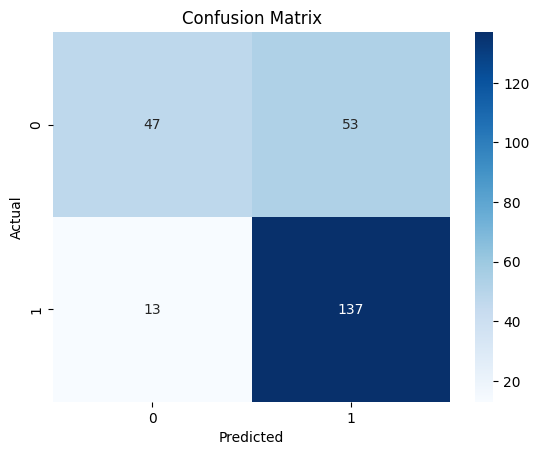

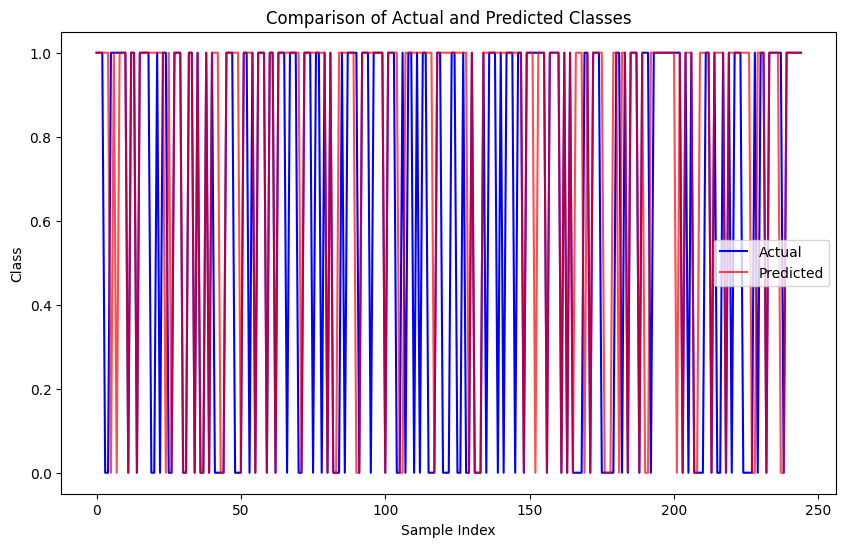

Mean Squared Error between y_test and predicted_class: 0.264


In [ ]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load and preprocess data
data = pd.read_excel('/content/pcanew12.xlsx')
X = data[['PCA1', 'PCA2', 'PCA3', 'PCA4', 'PCA5','PCA6', 'PCA7', 'PCA8', 'PCA9', 'PCA10','PCA11','PCA12']]
y = data['Returns direction']

# Normalize features
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X)

# Convert y to one-hot encoding
y_onehot = pd.get_dummies(y)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_normalized, y_onehot, test_size=0.2, random_state=42)



def train():
        # Define the model
        model = Sequential()
        model.add(Dense(32, input_dim=X_train.shape[1], activation='tanh'))  # Input layer with 32 neurons
        model.add(Dense(64, activation='tanh'))  # Hidden layer with  64 neurons
        model.add(Dense(128, activation='tanh'))  # Hidden layer with  64 neurons
        model.add(Dense(2, activation='softmax'))  # Output layer with 2 nodes and softmax activation

        # Compile the model
        model.compile(loss='categorical_crossentropy', optimizer='Nadam', metrics=['accuracy'])

        # Train the model
        epochs = 10
        batch_size = 32

        # Initialize lists to store train loss and accuracy for each epoch
        train_loss_history = []
        train_accuracy_history = []

        for epoch in range(epochs):
            # Shuffle training data for each epoch
            indices = np.arange(X_train.shape[0])
            np.random.shuffle(indices)
            X_train_shuffled = X_train[indices]
            y_train_shuffled = y_train.iloc[indices]

            # Train the model for one epoch in batches
            for i in range(0, X_train.shape[0], batch_size):
                X_batch = X_train_shuffled[i:i+batch_size]
                y_batch = y_train_shuffled[i:i+batch_size]
                history = model.train_on_batch(X_batch, y_batch)

            # Calculate train loss and accuracy for this epoch
            train_loss, train_accuracy = model.evaluate(X_train, y_train, verbose=0)
            train_loss_history.append(train_loss)
            train_accuracy_history.append(train_accuracy)

            print(f"Epoch {epoch+1}/{epochs} - Train Loss: {train_loss}, Train Accuracy: {train_accuracy}")

            val_loss, val_accuracy = model.evaluate(X_test, y_test, verbose=0)
            print(f"val Loss: {val_loss}, Val Accuracy: {val_accuracy}")
        y_pred = model.predict(X_test)
        return y_pred


y_pred=train()

# Convert predicted probabilities to class labels
y_pred_labels = np.argmax(y_pred, axis=1)
y_test_binary = np.argmax(y_test.values, axis=1)

# Compute F1 score
f1 = f1_score(np.argmax(y_test.values, axis=1), y_pred_labels)
print(f"F1 Score: {f1}")


print(classification_report(y_test_binary, y_pred_labels))

# Calculate confusion matrix
cm = confusion_matrix(np.argmax(y_test.values, axis=1), y_pred_labels)

# Visualize confusion matrix as a heatmap
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(y_test_binary[:245], 'b', label='Actual')
plt.plot(y_pred_labels[:245], 'r', alpha=0.7, label='Predicted')
plt.xlabel('Sample Index')
plt.ylabel('Class')
plt.title('Comparison of Actual and Predicted Classes')
plt.legend()
plt.show()

from sklearn.metrics import mean_squared_error

# Given that y_test and predicted_class are already defined:
mse = mean_squared_error(y_test_binary, y_pred_labels)
print("Mean Squared Error between y_test and predicted_class:", mse)